# Capstone Project: New York and Toronto - An Analogy

The project aims to draw comparisons between the cities of New York and Toronto using machine learning algorithms, and thereby group similar neighbourhoods in these cities together.
The data science methodology used in the project is outlined below:
 1. Define Business Problem
 2. Data Loading, Cleaning and Preparation
 3. Data Analysis
 4. Result Exploration
 
 The Business problem here is, as mentioned above, to compare the cities of New York and Toronto using data science techniques, based on their venue information

### 1. Data Loading and Cleaning

In [1]:
# Import Basic Libraries
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np

#### 1.1 Read and Clean Toronto data (i.e. Canada data as of now)

1.1.1 Import the Canada postal code data from the wikipedia pade to pandas dataframe and do some preliminary data cleaning to get postalcode-borough-neighbourhood data

In [2]:
# Export canada postal code data from the wikipedia page to pandas dataframe
tor_url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
# There are two tables on this page and the required table is the first one
# Get the first table on the Wikipedia page
toronto_df1 = pd.read_html(tor_url, header = 0)[0]
# Original Dimensions of the dataframe
print(toronto_df1.shape)
# See first ten rows
toronto_df1.head(10)

(288, 3)


Postcode           Borough     Neighbourhood
0      M1A      Not assigned      Not assigned
1      M2A      Not assigned      Not assigned
2      M3A        North York         Parkwoods
3      M4A        North York  Victoria Village
4      M5A  Downtown Toronto      Harbourfront
5      M5A  Downtown Toronto       Regent Park
6      M6A        North York  Lawrence Heights
7      M6A        North York    Lawrence Manor
8      M7A      Queen's Park      Not assigned
9      M8A      Not assigned      Not assigned

In [3]:
# Rename 'postcode' column to 'postal code' to easen the joining with toronto geospatial dataframe later
toronto_df1.rename(columns={'Postcode':'Postal Code'}, inplace=True)

## Remove all rows with 'Not assigned' value for Borough

# Check the proportion of 'Not Assigned' rows in Borough column
print(toronto_df1['Borough'].value_counts())
# Remove 'not assigned' rows
toronto_Df2 = toronto_df1[toronto_df1['Borough'] != 'Not assigned']
# reset index
toronto_Df2.reset_index(drop=True, inplace=True)
# Dimensions of the dataframe after removal of 'Not Assigned' rows 
# On checking with original dimensions, the number of rows should have reduced by the value count of 'Not Assigned' rows
print(toronto_Df2.shape)
# See first ten rows
toronto_Df2.head(10)

Not assigned        77
Etobicoke           45
North York          38
Downtown Toronto    37
Scarborough         37
Central Toronto     17
West Toronto        13
York                 9
East Toronto         7
East York            6
Queen's Park         1
Mississauga          1
Name: Borough, dtype: int64
(211, 3)


Postal Code           Borough     Neighbourhood
0         M3A        North York         Parkwoods
1         M4A        North York  Victoria Village
2         M5A  Downtown Toronto      Harbourfront
3         M5A  Downtown Toronto       Regent Park
4         M6A        North York  Lawrence Heights
5         M6A        North York    Lawrence Manor
6         M7A      Queen's Park      Not assigned
7         M9A         Etobicoke  Islington Avenue
8         M1B       Scarborough             Rouge
9         M1B       Scarborough           Malvern

In [4]:
# Change the value of Neighborhood column to that of Borough column wherever no value is assigned e.g. Queen's Park Borugh(M7A)
for index, row in toronto_Df2.iterrows():
    if row['Neighbourhood'] == 'Not assigned':
        row['Neighbourhood'] = row['Borough']
# Sanity check : See first ten rows
toronto_Df2.head(10)

Postal Code           Borough     Neighbourhood
0         M3A        North York         Parkwoods
1         M4A        North York  Victoria Village
2         M5A  Downtown Toronto      Harbourfront
3         M5A  Downtown Toronto       Regent Park
4         M6A        North York  Lawrence Heights
5         M6A        North York    Lawrence Manor
6         M7A      Queen's Park      Queen's Park
7         M9A         Etobicoke  Islington Avenue
8         M1B       Scarborough             Rouge
9         M1B       Scarborough           Malvern

In [5]:
# Group neighborhoods with same values for Postalcode and Borough
toronto_Df2 = toronto_Df2.groupby(['Postal Code','Borough'])['Neighbourhood'].apply(','.join).reset_index()
# Dimensions of the dataframe after joining
print(toronto_Df2.shape)
toronto_Df2.head(10)

(103, 3)


Postal Code      Borough                                  Neighbourhood
0         M1B  Scarborough                                  Rouge,Malvern
1         M1C  Scarborough           Highland Creek,Rouge Hill,Port Union
2         M1E  Scarborough                Guildwood,Morningside,West Hill
3         M1G  Scarborough                                         Woburn
4         M1H  Scarborough                                      Cedarbrae
5         M1J  Scarborough                            Scarborough Village
6         M1K  Scarborough      East Birchmount Park,Ionview,Kennedy Park
7         M1L  Scarborough                  Clairlea,Golden Mile,Oakridge
8         M1M  Scarborough  Cliffcrest,Cliffside,Scarborough Village West
9         M1N  Scarborough                     Birch Cliff,Cliffside West

1.1.2 Fetch latitude-longitude data for each neighbourhood and append it to the original dataframe to create Canada PostalCode-Geospatial DataFrame. Then isolate the Toronto neighbourhood data to get the required dataframe

In [6]:
## Concat the Canada postal code dataframe with the corresponding latitude/longitude data

# Download the geospatial dataset(i.e. latitude/longitude data) for postal codes
!wget -q -O 'Geospatial_data.csv' http://cocl.us/Geospatial_data
print('Data downloaded!')
# Read the geospatial data csv file to a pandas dataframe
geo_df = pd.read_csv('Geospatial_data.csv')
# View first few rows of new df
geo_df.head()

Data downloaded!


Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [7]:
# Merge the formatted Canada dataframe(Df2) and Geospatial dataframe
toronto_Df3 = pd.merge(toronto_Df2, geo_df, left_on='Postal Code', right_on='Postal Code')
# View first few rows of the merged dataframe
toronto_Df3.head()

Postal Code      Borough                         Neighbourhood   Latitude  \
0         M1B  Scarborough                         Rouge,Malvern  43.806686   
1         M1C  Scarborough  Highland Creek,Rouge Hill,Port Union  43.784535   
2         M1E  Scarborough       Guildwood,Morningside,West Hill  43.763573   
3         M1G  Scarborough                                Woburn  43.770992   
4         M1H  Scarborough                             Cedarbrae  43.773136   

   Longitude  
0 -79.194353  
1 -79.160497  
2 -79.188711  
3 -79.216917  
4 -79.239476

In [8]:
# Delete postal code column just to be in sync with the corresponding New York dataframe later
del toronto_Df3['Postal Code']
# Filter Toronto borough data from the Canada data
toronto_data = toronto_Df3[toronto_Df3['Borough'].str.contains('Toronto')].reset_index(drop=True)
# Dimension of new df
print(toronto_data.shape)
# Value counts
print(toronto_data['Borough'].value_counts())

toronto_data.head()

(38, 4)
Downtown Toronto    18
Central Toronto      9
West Toronto         6
East Toronto         5
Name: Borough, dtype: int64


Borough                  Neighbourhood   Latitude  Longitude
0     East Toronto                    The Beaches  43.676357 -79.293031
1     East Toronto    The Danforth West,Riverdale  43.679557 -79.352188
2     East Toronto  The Beaches West,India Bazaar  43.668999 -79.315572
3     East Toronto                Studio District  43.659526 -79.340923
4  Central Toronto                  Lawrence Park  43.728020 -79.388790

#### 1.2 New York

Download the JSON file from New York Spatial Data Repository and load it to a pandas dataframe. The JSON file already contains the geospatial data along with borough data for each neighbourhood.

In [9]:
# Import required libraries
import json # library to handle JSON files
from pandas.io.json import json_normalize # to tranform JSON file into a pandas dataframe
# Set options to see full pandas dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [10]:
# Download the JSON file
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')

# Load the JSON file
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

# On exploring the JSON file, all the required data is stored in 'features' key
neighborhoods_data = newyork_data['features']
neighborhoods_data[0]

Data downloaded!


{'geometry': {'coordinates': [-73.84720052054902, 40.89470517661],
  'type': 'Point'},
 'geometry_name': 'geom',
 'id': 'nyu_2451_34572.1',
 'properties': {'annoangle': 0.0,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661],
  'borough': 'Bronx',
  'name': 'Wakefield',
  'stacked': 1},
 'type': 'Feature'}

In [11]:
# define the dataframe columns
column_names = ['Borough', 'Neighbourhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
NY_data = pd.DataFrame(columns=column_names)

# filter and load required data
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NY_data = NY_data.append({'Borough': borough,
                              'Neighbourhood': neighborhood_name,
                              'Latitude': neighborhood_lat,
                              'Longitude': neighborhood_lon}, ignore_index=True)

# View the first few rows of the new dataframe
NY_data.head()

Borough Neighbourhood   Latitude  Longitude
0   Bronx     Wakefield  40.894705 -73.847201
1   Bronx    Co-op City  40.874294 -73.829939
2   Bronx   Eastchester  40.887556 -73.827806
3   Bronx     Fieldston  40.895437 -73.905643
4   Bronx     Riverdale  40.890834 -73.912585

There is no further cleaning required for New York Data as there are no 'not assigned' boroughs or neighbourhoods.

### 2. Initial Data Exploration, further Data Loading and Preparation

View the neighbourhoods on the maps of the two cities, fetch nearby venue data for neighbourhoods from Foursquare API and prepare the data for final Data Analysis.

In [12]:
# Using neighbourhood data(from FourSquare) on the above dataframe, explore and cluster Toronto neighbourhood 
# with the help of K-Means Clustering technique

# Import required libraries
import requests # library to handle requests to/from the API

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim # to convert an address into latitude and longitude values

!pip -q install folium #if folium is not present')
print('Installed')

import folium # map rendering library
print('Import Complete')

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
Installed
Import Complete


Visualize the neighbourhoods on the map of Toronto

In [13]:
# Toronto
# Lets get the geographic coordinates of Toronto
address = 'Toronto, ON, Canada'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_toronto) 
map_toronto

The geograpical coordinate of Toronto are 43.653963, -79.387207.


Visualize the neighbourhoods on the map of New York

In [14]:
# New York
# Lets get the geographic coordinates of New York
address = 'New York, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(NY_data['Latitude'], NY_data['Longitude'], NY_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='orange',
            fill=True,
            fill_color='#3186cc',
            fill_opacity=0.7,
            parse_html=False).add_to(map_newyork) 
map_newyork

The geograpical coordinate of New York are 40.7127281, -74.0060152.


Get neighbourhood data from Foursquare API, format it to form a pandas dataframe

In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
# Function to return nearby venues for all neighborhoods and load it into a dataframe
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        LIMIT = 25    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                      'Neighbourhood Latitude', 
                      'Neighbourhood Longitude', 
                      'Venue', 
                      'Venue Latitude', 
                      'Venue Longitude', 
                      'Venue Category']
    return(nearby_venues)



# Function to sort venues in desc order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

#### 2.1 Venues - Toronto

In [17]:
#Fetch prominent venues in each neighbourhood in Toronto using function defined above and load it into a dataframe
toronto_venues = getNearbyVenues(names = toronto_data['Neighbourhood'],
                                 latitudes  = toronto_data['Latitude'],
                                 longitudes = toronto_data['Longitude']
                                 )

# Size of the output df
print(toronto_venues.shape)
toronto_venues.head()

The Beaches
The Danforth West,Riverdale
The Beaches West,India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park,Summerhill East
Deer Park,Forest Hill SE,Rathnelly,South Hill,Summerhill West
Rosedale
Cabbagetown,St. James Town
Church and Wellesley
Harbourfront,Regent Park
Ryerson,Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide,King,Richmond
Harbourfront East,Toronto Islands,Union Station
Design Exchange,Toronto Dominion Centre
Commerce Court,Victoria Hotel
Roselawn
Forest Hill North,Forest Hill West
The Annex,North Midtown,Yorkville
Harbord,University of Toronto
Chinatown,Grange Park,Kensington Market
CN Tower,Bathurst Quay,Island airport,Harbourfront West,King and Spadina,Railway Lands,South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place,Underground city
Christie
Dovercourt Village,Dufferin
Little Portugal,Trinity
Brockton,Exhibition Place,Parkdale Village
High Park,The Junction South
Parkdale,Roncesvall

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0   The Beaches               43.676357               -79.293031   
1   The Beaches               43.676357               -79.293031   
2   The Beaches               43.676357               -79.293031   
3   The Beaches               43.676357               -79.293031   
4   The Beaches               43.676357               -79.293031   

                                Venue  Venue Latitude  Venue Longitude  \
0                   Glen Manor Ravine       43.676821       -79.293942   
1  The Big Carrot Natural Food Market       43.678879       -79.297734   
2                 Grover Pub and Grub       43.679181       -79.297215   
3                 Glen Stewart Ravine       43.676300       -79.294784   
4                       Upper Beaches       43.680563       -79.292869   

         Venue Category  
0                 Trail  
1     Health Food Store  
2                   Pub  
3  Other Great Outdoors  
4          Neighborhood

In [18]:
# Group venues per neighbourhood
toronto_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  \
Neighbourhood                                                                
Adelaide,King,Richmond                                                  25   
Berczy Park                                                             25   
Brockton,Exhibition Place,Parkdale Village                              22   
Business Reply Mail Processing Centre 969 Eastern                       19   
CN Tower,Bathurst Quay,Island airport,Harbourfr...                      16   
Cabbagetown,St. James Town                                              25   
Central Bay Street                                                      25   
Chinatown,Grange Park,Kensington Market                                 25   
Christie                                                                15   
Church and Wellesley                                                    25   
Commerce Court,Victoria Hotel                                           25   
Davisville                                                              25   
Davisville North                                                         8   
Deer Park,Forest Hill SE,Rathnelly,South Hill,S...                      14   
Design Exchange,Toronto Dominion Centre                                 25   
Dovercourt Village,Dufferin                                             20   
First Canadian Place,Underground city                                   25   
Forest Hill North,Forest Hill West                                       4   
Harbord,University of Toronto                                           25   
Harbourfront East,Toronto Islands,Union Station                         25   
Harbourfront,Regent Park                                                25   
High Park,The Junction South                                            23   
Lawrence Park                                                            3   
Little Portugal,Trinity                                                 25   
Moore Park,Summerhill East                                               2   
North Toronto West                                                      16   
Parkdale,Roncesvalles                                                   15   
Rosedale                                                                 5   
Roselawn                                                                 2   
Runnymede,Swansea                                                       25   
Ryerson,Garden District                                                 25   
St. James Town                                                          25   
Stn A PO Boxes 25 The Esplanade                                         25   
Studio District                                                         25   
The Annex,North Midtown,Yorkville                                       23   
The Beaches                                                              5   
The Beaches West,India Bazaar                                           18   
The Danforth West,Riverdale                                             25   

                                                    Neighbourhood Longitude  \
Neighbourhood                                                                 
Adelaide,King,Richmond                                                   25   
Berczy Park                                                              25   
Brockton,Exhibition Place,Parkdale Village                               22   
Business Reply Mail Processing Centre 969 Eastern                        19   
CN Tower,Bathurst Quay,Island airport,Harbourfr...                       16   
Cabbagetown,St. James Town                                               25   
Central Bay Street                                                       25   
Chinatown,Grange Park,Kensington Market                                  25   
Christie                                                                 15   
Church and Wellesley                                          

In [19]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 177 uniques categories.


In [20]:
# Convert all categorical data to numerical data since sklearn kit can't process these
# one hot encoding for venues
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood']
# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
# dimensions of the new df
print(toronto_onehot.shape)
toronto_onehot.head()

(730, 178)


Neighbourhood  Airport  Airport Food Court  Airport Gate  Airport Lounge  \
0   The Beaches        0                   0             0               0   
1   The Beaches        0                   0             0               0   
2   The Beaches        0                   0             0               0   
3   The Beaches        0                   0             0               0   
4   The Beaches        0                   0             0               0   

   Airport Service  Airport Terminal  American Restaurant  Antique Shop  \
0                0                 0                    0             0   
1                0                 0                    0             0   
2                0                 0                    0             0   
3                0                 0                    0             0   
4                0                 0                    0             0   

   Art Gallery  Arts & Crafts Store  Asian Restaurant  Auto Workshop  \
0            0                    0                 0              0   
1            0                    0                 0              0   
2            0                    0                 0              0   
3            0                    0                 0              0   
4            0                    0                 0              0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Basketball Stadium  \
0          0           0           0       0     0    0                   0   
1          0           0           0       0     0    0                   0   
2          0           0           0       0     0    0                   0   
3          0           0           0       0     0    0                   0   
4          0           0           0       0     0    0                   0   

   Beer Bar  Bistro  Boat or Ferry  Bookstore  Boutique  Brazilian Restaurant  \
0         0       0              0          0         0                     0   
1         0       0              0          0         0                     0   
2         0       0              0          0         0                     0   
3         0       0              0          0         0                     0   
4         0       0              0          0         0                     0   

   Breakfast Spot  Brewery  Bubble Tea Shop  Building  Burger Joint  \
0               0        0                0         0             0   
1               0        0                0         0             0   
2               0        0                0         0             0   
3               0        0                0         0             0   
4               0        0                0         0             0   

   Burrito Place  Bus Line  Butcher  Café  Cajun / Creole Restaurant  \
0              0         0        0     0                          0   
1              0         0        0     0                          0   
2              0         0        0     0                          0   
3              0         0        0     0                          0   
4              0         0        0     0                          0   

   Caribbean Restaurant  Cheese Shop  Chinese Restaurant  Chocolate Shop  \
0                     0            0                   0               0   
1                     0            0                   0               0   
2                     0            0                   0               0   
3                     0            0                   0               0   
4                     0            0                   0               0   

   Church  Climbing Gym  Clothing Store  Cocktail Bar  Coffee Shop  \
0       0             0               0             0            0   
1       0             0               0             0            0   
2       0             0               0             0            0   
3       0             0               0             0            0   
4       0           

In [21]:
# Group the new dataframe by Neighbourhood
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

Neighbourhood  Airport  \
0                              Adelaide,King,Richmond   0.0000   
1                                         Berczy Park   0.0000   
2          Brockton,Exhibition Place,Parkdale Village   0.0000   
3   Business Reply Mail Processing Centre 969 Eastern   0.0000   
4   CN Tower,Bathurst Quay,Island airport,Harbourf...   0.0625   
5                          Cabbagetown,St. James Town   0.0000   
6                                  Central Bay Street   0.0000   
7             Chinatown,Grange Park,Kensington Market   0.0000   
8                                            Christie   0.0000   
9                                Church and Wellesley   0.0000   
10                      Commerce Court,Victoria Hotel   0.0000   
11                                         Davisville   0.0000   
12                                   Davisville North   0.0000   
13  Deer Park,Forest Hill SE,Rathnelly,South Hill,...   0.0000   
14            Design Exchange,Toronto Dominion Centre   0.0000   
15                        Dovercourt Village,Dufferin   0.0000   
16              First Canadian Place,Underground city   0.0000   
17                 Forest Hill North,Forest Hill West   0.0000   
18                      Harbord,University of Toronto   0.0000   
19    Harbourfront East,Toronto Islands,Union Station   0.0000   
20                           Harbourfront,Regent Park   0.0000   
21                       High Park,The Junction South   0.0000   
22                                      Lawrence Park   0.0000   
23                            Little Portugal,Trinity   0.0000   
24                         Moore Park,Summerhill East   0.0000   
25                                 North Toronto West   0.0000   
26                              Parkdale,Roncesvalles   0.0000   
27                                           Rosedale   0.0000   
28                                           Roselawn   0.0000   
29                                  Runnymede,Swansea   0.0000   
30                            Ryerson,Garden District   0.0000   
31                                     St. James Town   0.0000   
32                    Stn A PO Boxes 25 The Esplanade   0.0000   
33                                    Studio District   0.0000   
34                  The Annex,North Midtown,Yorkville   0.0000   
35                                        The Beaches   0.0000   
36                      The Beaches West,India Bazaar   0.0000   
37                        The Danforth West,Riverdale   0.0000   

    Airport Food Court  Airport Gate  Airport Lounge  Airport Service  \
0               0.0000        0.0000           0.000            0.000   
1               0.0000        0.0000           0.000            0.000   
2               0.0000        0.0000           0.000            0.000   
3               0.0000        0.0000           0.000            0.000   
4               0.0625        0.0625           0.125            0.125   
5               0.0000        0.0000           0.000            0.000   
6               0.0000        0.0000           0.000            0.000   
7               0.0000        0.0000           0.000            0.000   
8               0.0000        0.0000           0.000            0.000   
9               0.0000        0.0000           0.000            0.000   
10              0.0000        0.0000           0.000            0.000   
11              0.0000        0.0000           0.000            0.000   
12              0.0000        0.0000           0.000            0.000   
13              0.0000        0.0000           0.000            0.000   
14              0.0000        0.0000           0.000            0.000   
15              0.0000        0.0000           0.000            0.000   
16              0.0000        0.0000           0.000            0.000   
17              0.0000        0.0000           0.000            0.000   
18              0.0000        0.0000           0.000            0.000   
19   

In [22]:
# Since the readability of the above dataframe is poor, create a new dataframe with better comprehension
# New dataframe of neighbourhood data with values for 10 most common venues in order
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
toronto_venues_sorted = pd.DataFrame(columns=columns)
toronto_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']
for ind in np.arange(toronto_grouped.shape[0]):
    toronto_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)
print(toronto_venues_sorted.shape)
toronto_venues_sorted.head(15)

(38, 11)


Neighbourhood 1st Most Common Venue  \
0                              Adelaide,King,Richmond            Steakhouse   
1                                         Berczy Park              Beer Bar   
2          Brockton,Exhibition Place,Parkdale Village           Coffee Shop   
3   Business Reply Mail Processing Centre 969 Eastern           Yoga Studio   
4   CN Tower,Bathurst Quay,Island airport,Harbourf...        Airport Lounge   
5                          Cabbagetown,St. James Town            Restaurant   
6                                  Central Bay Street           Coffee Shop   
7             Chinatown,Grange Park,Kensington Market                  Café   
8                                            Christie         Grocery Store   
9                                Church and Wellesley             Gastropub   
10                      Commerce Court,Victoria Hotel                  Café   
11                                         Davisville          Dessert Shop   
12                                   Davisville North         Grocery Store   
13  Deer Park,Forest Hill SE,Rathnelly,South Hill,...           Coffee Shop   
14            Design Exchange,Toronto Dominion Centre           Coffee Shop   

   2nd Most Common Venue  3rd Most Common Venue  \
0                  Hotel       Asian Restaurant   
1                   Café           Cocktail Bar   
2                   Café         Breakfast Spot   
3                   Park             Skate Park   
4        Airport Service       Airport Terminal   
5                   Café     Italian Restaurant   
6     Italian Restaurant        Bubble Tea Shop   
7                 Bakery  Vietnamese Restaurant   
8                   Café                   Park   
9       Ramen Restaurant              Bookstore   
10           Coffee Shop             Restaurant   
11           Coffee Shop                   Café   
12                  Park      Food & Drink Shop   
13                   Pub            Pizza Place   
14         Deli / Bodega                   Café   

            4th Most Common Venue   5th Most Common Venue  \
0                     Opera House             Pizza Place   
1              Seafood Restaurant          Farmers Market   
2                             Bar                     Gym   
3                         Brewery           Burrito Place   
4                 Harbor / Marina        Sculpture Garden   
5                       Gift Shop           Deli / Bodega   
6                             Spa      Seafood Restaurant   
7   Vegetarian / Vegan Restaurant      Mexican Restaurant   
8                     Coffee Shop               Nightclub   
9                  Breakfast Spot         Bubble Tea Shop   
10                  Deli / Bodega               Gastropub   
11             Italian Restaurant        Sushi Restaurant   
12                 Sandwich Place                   Hotel   
13            Fried Chicken Joint              Sports Bar   
14                     Restaurant  Gluten-free Restaurant   

         6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0                       Lounge    Seafood Restaurant          Noodle House   
1                     Tea Room           Fish Market                Bistro   
2       Furniture / Home Store          Intersection    Italian Restaurant   
3                   Restaurant      Recording Studio               Butcher   
4           Airport Food Court          Airport Gate                   Bar   
5                        Diner               Butcher  Caribbean Restaurant   
6   Modern European Restaurant      Sushi Restaurant      Ramen Restaurant   
7         Caribbean Restaurant          Cocktail Bar              Wine Bar   
8                        Diner            Baby Store            Restaurant   
9           Salon / Barbershop          Burger Joint            Restaurant   
10         Japanese Restaurant                Museum                   Gym   
11           Indian Restaurant               

#### 2.2 Venues - New York

In [23]:
#Fetch prominent venues in each neighbourhood in New York and load it into a dataframe
newyork_venues = getNearbyVenues(names = NY_data['Neighbourhood'],
                                 latitudes  = NY_data['Latitude'],
                                 longitudes = NY_data['Longitude']
                                 )
# Size of the output df
print(newyork_venues.shape)
newyork_venues.head()

Wakefield
Co-op City
Eastchester
Fieldston
Riverdale
Kingsbridge
Marble Hill
Woodlawn
Norwood
Williamsbridge
Baychester
Pelham Parkway
City Island
Bedford Park
University Heights
Morris Heights
Fordham
East Tremont
West Farms
High  Bridge
Melrose
Mott Haven
Port Morris
Longwood
Hunts Point
Morrisania
Soundview
Clason Point
Throgs Neck
Country Club
Parkchester
Westchester Square
Van Nest
Morris Park
Belmont
Spuyten Duyvil
North Riverdale
Pelham Bay
Schuylerville
Edgewater Park
Castle Hill
Olinville
Pelham Gardens
Concourse
Unionport
Edenwald
Bay Ridge
Bensonhurst
Sunset Park
Greenpoint
Gravesend
Brighton Beach
Sheepshead Bay
Manhattan Terrace
Flatbush
Crown Heights
East Flatbush
Kensington
Windsor Terrace
Prospect Heights
Brownsville
Williamsburg
Bushwick
Bedford Stuyvesant
Brooklyn Heights
Cobble Hill
Carroll Gardens
Red Hook
Gowanus
Fort Greene
Park Slope
Cypress Hills
East New York
Starrett City
Canarsie
Flatlands
Mill Island
Manhattan Beach
Coney Island
Bath Beach
Borough Park
Dyker

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0     Wakefield               40.894705               -73.847201   
1     Wakefield               40.894705               -73.847201   
2     Wakefield               40.894705               -73.847201   
3     Wakefield               40.894705               -73.847201   
4     Wakefield               40.894705               -73.847201   

                                     Venue  Venue Latitude  Venue Longitude  \
0                         Lollipops Gelato       40.894123       -73.845892   
1                                 Rite Aid       40.896649       -73.844846   
2                         Carvel Ice Cream       40.890487       -73.848568   
3  Cooler Runnings Jamaican Restaurant Inc       40.898276       -73.850381   
4                                  Dunkin'       40.890459       -73.849089   

         Venue Category  
0          Dessert Shop  
1              Pharmacy  
2        Ice Cream Shop  
3  Caribbean Restaurant  
4            Donut Shop

In [24]:
# Group venues per neighbourhood
newyork_venues.groupby('Neighbourhood').count()

Neighbourhood Latitude  Neighbourhood Longitude  \
Neighbourhood                                                                
Allerton                                       25                       25   
Annadale                                        9                        9   
Arden Heights                                   4                        4   
Arlington                                       6                        6   
Arrochar                                       20                       20   
Arverne                                        17                       17   
Astoria                                        25                       25   
Astoria Heights                                14                       14   
Auburndale                                     21                       21   
Bath Beach                                     25                       25   
Battery Park City                              25                       25   
Bay Ridge                                      25                       25   
Bay Terrace                                    36                       36   
Baychester                                     22                       22   
Bayside                                        25                       25   
Bayswater                                       3                        3   
Bedford Park                                   25                       25   
Bedford Stuyvesant                             25                       25   
Beechhurst                                     19                       19   
Bellaire                                       11                       11   
Belle Harbor                                   18                       18   
Bellerose                                      18                       18   
Belmont                                        25                       25   
Bensonhurst                                    25                       25   
Bergen Beach                                    6                        6   
Blissville                                     17                       17   
Bloomfield                                      5                        5   
Boerum Hill                                    25                       25   
Borough Park                                   21                       21   
Breezy Point                                    6                        6   
Briarwood                                      11                       11   
Brighton Beach                                 25                       25   
Broad Channel                                   7                        7   
Broadway Junction                              16                       16   
Bronxdale                                      17                       17   
Brooklyn Heights                               25                       25   
Brookville                                      2                        2   
Brownsville                                    20                       20   
Bulls Head                                     25                       25   
Bushwick                                       25                       25   
Butler Manor                                    6                        6   
Cambria Heights                                12                       12   
Canarsie                                        6                        6   
Carnegie Hill                                  25                       25   
Carroll Gardens                                25                       25   
Castle Hill                                     9                        9   
Castleton Corners                              15                       15   
Central Harlem                                 25                       25   
Charleston                                     25                       25   
Chelsea                                        29

In [25]:
print('There are {} uniques categories in New York.'.format(len(newyork_venues['Venue Category'].unique())))

There are 367 uniques categories in New York.


In [26]:
# Convert all categorical data to numerical data like in the case of Toronto data
# one hot encoding for venues
newyork_onehot = pd.get_dummies(newyork_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
newyork_onehot['Neighbourhood'] = newyork_venues['Neighbourhood']
# move neighborhood column to the first column
fixed_columns = [newyork_onehot.columns[-1]] + list(newyork_onehot.columns[:-1])
newyork_onehot = newyork_onehot[fixed_columns]
# dimensions of the new dataframe
print(newyork_onehot.shape)
newyork_onehot.head()

(5600, 368)


Neighbourhood  Accessories Store  Adult Boutique  Afghan Restaurant  \
0     Wakefield                  0               0                  0   
1     Wakefield                  0               0                  0   
2     Wakefield                  0               0                  0   
3     Wakefield                  0               0                  0   
4     Wakefield                  0               0                  0   

   African Restaurant  American Restaurant  Animal Shelter  Antique Shop  \
0                   0                    0               0             0   
1                   0                    0               0             0   
2                   0                    0               0             0   
3                   0                    0               0             0   
4                   0                    0               0             0   

   Arcade  Arepa Restaurant  Argentinian Restaurant  Art Gallery  Art Museum  \
0       0                 0                       0            0           0   
1       0                 0                       0            0           0   
2       0                 0                       0            0           0   
3       0                 0                       0            0           0   
4       0                 0                       0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0                    0                 0                   0   
1                    0                 0                   0   
2                    0                 0                   0   
3                    0                 0                   0   
4                    0                 0                   0   

   Australian Restaurant  Auto Garage  Automotive Shop  BBQ Joint  Baby Store  \
0                      0            0                0          0           0   
1                      0            0                0          0           0   
2                      0            0                0          0           0   
3                      0            0                0          0           0   
4                      0            0                0          0           0   

   Bagel Shop  Bakery  Bank  Bar  Baseball Field  Baseball Stadium  \
0           0       0     0    0               0                 0   
1           0       0     0    0               0                 0   
2           0       0     0    0               0                 0   
3           0       0     0    0               0                 0   
4           0       0     0    0               0                 0   

   Basketball Court  Beach  Beach Bar  Bed & Breakfast  Beer Bar  Beer Garden  \
0                 0      0          0                0         0            0   
1                 0      0          0                0         0            0   
2                 0      0          0                0         0            0   
3                 0      0          0                0         0            0   
4                 0      0          0                0         0            0   

   Beer Store  Big Box Store  Bike Rental / Bike Share  Bike Shop  Bike Trail  \
0           0              0                         0          0           0   
1           0              0                         0          0           0   
2           0              0                         0          0           0   
3           0              0                         0          0           0   
4           0              0                         0          0           0   

   Bistro  Board Shop  Boat or Ferry  Bookstore  Boutique  Bowling Alley  \
0       0           0              0          0         0              0   
1       0           0              0          0         0              0   
2       0           0              0          0         0              0   
3       0           0              0          0       

In [27]:
# Group the dataframe by Neighbourhood
newyork_grouped = newyork_onehot.groupby('Neighbourhood').mean().reset_index()
newyork_grouped

Neighbourhood  Accessories Store  Adult Boutique  \
0                     Allerton           0.000000            0.00   
1                     Annadale           0.000000            0.00   
2                Arden Heights           0.000000            0.00   
3                    Arlington           0.000000            0.00   
4                     Arrochar           0.000000            0.00   
5                      Arverne           0.000000            0.00   
6                      Astoria           0.000000            0.00   
7              Astoria Heights           0.000000            0.00   
8                   Auburndale           0.000000            0.00   
9                   Bath Beach           0.000000            0.00   
10           Battery Park City           0.000000            0.00   
11                   Bay Ridge           0.000000            0.00   
12                 Bay Terrace           0.000000            0.00   
13                  Baychester           0.000000            0.00   
14                     Bayside           0.000000            0.00   
15                   Bayswater           0.000000            0.00   
16                Bedford Park           0.000000            0.00   
17          Bedford Stuyvesant           0.000000            0.00   
18                  Beechhurst           0.000000            0.00   
19                    Bellaire           0.000000            0.00   
20                Belle Harbor           0.000000            0.00   
21                   Bellerose           0.000000            0.00   
22                     Belmont           0.000000            0.00   
23                 Bensonhurst           0.000000            0.00   
24                Bergen Beach           0.000000            0.00   
25                  Blissville           0.000000            0.00   
26                  Bloomfield           0.000000            0.00   
27                 Boerum Hill           0.000000            0.00   
28                Borough Park           0.000000            0.00   
29                Breezy Point           0.000000            0.00   
30                   Briarwood           0.000000            0.00   
31              Brighton Beach           0.000000            0.00   
32               Broad Channel           0.000000            0.00   
33           Broadway Junction           0.000000            0.00   
34                   Bronxdale           0.000000            0.00   
35            Brooklyn Heights           0.000000            0.00   
36                  Brookville           0.000000            0.00   
37                 Brownsville           0.000000            0.00   
38                  Bulls Head           0.000000            0.00   
39                    Bushwick           0.000000            0.00   
40                Butler Manor           0.000000            0.00   
41             Cambria Heights           0.000000            0.00   
42                    Canarsie           0.000000            0.00   
43               Carnegie Hill           0.000000            0.00   
44             Carroll Gardens           0.000000            0.00   
45                 Castle Hill           0.000000            0.00   
46           Castleton Corners           0.000000            0.00   
47              Central Harlem           0.000000            0.00   
48                  Charleston           0.000000            0.00   
49                     Chelsea           0.000000            0.00   
50                   Chinatown           0.000000            0.00   
51                 City Island           0.000000            0.00   
52                   City Line           0.000000            0.00   
53                Civic Center           0.000000            0.00   
54           Claremont Village           0.000000            0.00   
55                Clason Point           0.000000            0.00   
56                     Clifton           0.000000            0.00   
57             

In [28]:
# New dataframe of neighbourhood data with values for 10 most common venues in order
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
# create a new dataframe
newyork_venues_sorted = pd.DataFrame(columns=columns)
newyork_venues_sorted['Neighbourhood'] = newyork_grouped['Neighbourhood']
for ind in np.arange(newyork_grouped.shape[0]):
    newyork_venues_sorted.iloc[ind, 1:] = return_most_common_venues(newyork_grouped.iloc[ind, :], num_top_venues)
print(newyork_venues_sorted.shape)
newyork_venues_sorted.head()

(302, 11)


Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
0       Allerton           Pizza Place           Supermarket   
1       Annadale           Pizza Place            Sports Bar   
2  Arden Heights           Pizza Place              Pharmacy   
3      Arlington              Bus Stop         Deli / Bodega   
4       Arrochar         Deli / Bodega           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0              Pharmacy   Fried Chicken Joint  Fast Food Restaurant   
1                  Park                  Food                 Diner   
2           Coffee Shop              Bus Stop           Yoga Studio   
3   American Restaurant         Grocery Store         Boat or Ferry   
4    Italian Restaurant              Bus Stop            Food Truck   

  6th Most Common Venue     7th Most Common Venue 8th Most Common Venue  \
0           Gas Station            Breakfast Spot    Spanish Restaurant   
1            Restaurant             Train Station              Pharmacy   
2               Factory        Falafel Restaurant                  Farm   
3                  Food               Fish Market                  Farm   
4          Liquor Store  Mediterranean Restaurant        Sandwich Place   

  9th Most Common Venue     10th Most Common Venue  
0                   Spa                Bus Station  
1                 Field                 Eye Doctor  
2        Farmers Market       Fast Food Restaurant  
3        Farmers Market       Fast Food Restaurant  
4            Bagel Shop  Middle Eastern Restaurant

#### 2.3 Venue data - Toronto and New York Combined

In [29]:
# Toronto and New York venue data combined

neigh_data = pd.concat([toronto_data,NY_data], axis=0)
print('Raw Data Combined')
print(toronto_data.shape)
print(NY_data.shape)
print(neigh_data.shape)

neigh_grouped = pd.concat([toronto_grouped,newyork_grouped], axis=0)
print('Grouped Data Combined')
print(toronto_grouped.shape)
print(newyork_grouped.shape)
print(neigh_grouped.shape)

neighbourhood_venues_sorted = pd.concat([toronto_venues_sorted,newyork_venues_sorted], axis=0)
print('Sorted Venue Data Combined')
print(toronto_venues_sorted.shape)
print(newyork_venues_sorted.shape)
print(neighbourhood_venues_sorted.shape)

Raw Data Combined
(38, 4)
(306, 4)
(344, 4)
Grouped Data Combined
(38, 178)
(302, 368)
(340, 389)
Sorted Venue Data Combined
(38, 11)
(302, 11)
(340, 11)


In [30]:
# View the combined sorted dataframe 
neighbourhood_venues_sorted

Neighbourhood  \
0                               Adelaide,King,Richmond   
1                                          Berczy Park   
2           Brockton,Exhibition Place,Parkdale Village   
3    Business Reply Mail Processing Centre 969 Eastern   
4    CN Tower,Bathurst Quay,Island airport,Harbourf...   
5                           Cabbagetown,St. James Town   
6                                   Central Bay Street   
7              Chinatown,Grange Park,Kensington Market   
8                                             Christie   
9                                 Church and Wellesley   
10                       Commerce Court,Victoria Hotel   
11                                          Davisville   
12                                    Davisville North   
13   Deer Park,Forest Hill SE,Rathnelly,South Hill,...   
14             Design Exchange,Toronto Dominion Centre   
15                         Dovercourt Village,Dufferin   
16               First Canadian Place,Underground city   
17                  Forest Hill North,Forest Hill West   
18                       Harbord,University of Toronto   
19     Harbourfront East,Toronto Islands,Union Station   
20                            Harbourfront,Regent Park   
21                        High Park,The Junction South   
22                                       Lawrence Park   
23                             Little Portugal,Trinity   
24                          Moore Park,Summerhill East   
25                                  North Toronto West   
26                               Parkdale,Roncesvalles   
27                                            Rosedale   
28                                            Roselawn   
29                                   Runnymede,Swansea   
30                             Ryerson,Garden District   
31                                      St. James Town   
32                     Stn A PO Boxes 25 The Esplanade   
33                                     Studio District   
34                   The Annex,North Midtown,Yorkville   
35                                         The Beaches   
36                       The Beaches West,India Bazaar   
37                         The Danforth West,Riverdale   
0                                             Allerton   
1                                             Annadale   
2                                        Arden Heights   
3                                            Arlington   
4                                             Arrochar   
5                                              Arverne   
6                                              Astoria   
7                                      Astoria Heights   
8                                           Auburndale   
9                                           Bath Beach   
10                                   Battery Park City   
11                                           Bay Ridge   
12                                         Bay Terrace   
13                                          Baychester   
14                                             Bayside   
15                                           Bayswater   
16                                        Bedford Park   
17                                  Bedford Stuyvesant   
18                                          Beechhurst   
19                                            Bellaire   
20                                        Belle Harbor   
21                                           Bellerose   
22                                             Belmont   
23                                         Bensonhurst   
24                                        Bergen Beach   
25                                          Blissville   
26                                          Bloomfield   
27                                         Boerum Hill   
28                                        Borough Park   
29                                        Breezy Point   
30                                     

Here, we see that both cities have a neighbourhood with the name 'Rosedale'. This would be later dealt with in the data analysis stage

### 3. Data Analysis - Cluster the neighbourhoods

Apply unsupervised machine learning algorithms on the curated data to compare and cluster the neighbourhoods in the two cities. Firstly, we must choose the appropriate algorithm from the available clustering algorithms.
The most popular clustering algorithms are K-Means Clustering and Hierarchical Clustering(Agglomerative).

In [31]:
#check the Cophenetic Correlation Coefficient of Hierarchical clustering
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

neigh_grouped_clust = neigh_grouped.drop('Neighbourhood', 1)
neigh_grouped_clust.fillna(0, inplace=True)
import scipy.cluster.hierarchy as shc
neighbourhood_hierarchy = shc.linkage(neigh_grouped_clust, method='ward') 

c, coph_dists = cophenet(neighbourhood_hierarchy, pdist(neigh_grouped_clust))
c

0.41276750356550818

Since the dataset is large and cophenetic coefficient is very low, the performance of Hierarchical Clustering may not be efficient. So, we choose K-Means Clustering to proceed with data analysis

#### K-Means Clustering

In [32]:
from sklearn.cluster import KMeans

Choose the value of 'n' (no of clusters) to start the algorithm using elbow method and value of silhouette coefficient

1. Elbow Method

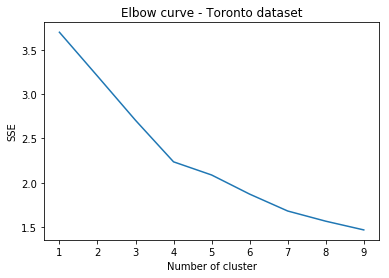

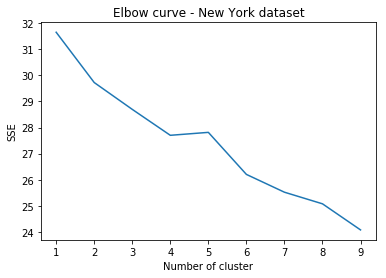

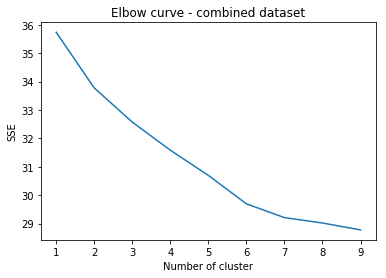

In [33]:
toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)
newyork_grouped_clustering = newyork_grouped.drop('Neighbourhood', 1)

#Elbow method - Toronto dataset
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000,random_state=3425).fit(toronto_grouped_clustering)
    toronto_grouped_clustering["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbow curve - Toronto dataset")
plt.show()

# Elbow method - New York dataset
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000,random_state=3425).fit(newyork_grouped_clustering)
    newyork_grouped_clustering["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbow curve - New York dataset")
plt.show()

# Elbow method - combined dataset
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000,random_state=3425).fit(neigh_grouped_clust)
    neigh_grouped_clust["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbow curve - combined dataset")
plt.show()

Here we see that, for the Toronto dataset, the curve has dips at n=4,5 and 7. For the New York data, the curve dips at n = 2,4, 5,6, 7 and 8. For the combined dataset, the curve has dips at n values of 2,6(approx.),7 and 8.

2. Silhouette Coefficient

In [34]:
from sklearn.metrics import silhouette_score

In [35]:
# Cosine metric
print("Silhouette Coefficient - Cosine metric")
# Toronto data
for n_cluster in range(2, 11):
    kmeans1 = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=1000,random_state=5).fit(toronto_grouped_clustering)
    label1 = kmeans1.labels_
    sil_coeff = silhouette_score(toronto_grouped_clustering, label1, metric='cosine')
    print("For n_clusters={}, The Silhouette Coefficient for Toronto is {}".format(n_cluster, sil_coeff))
    
print("")
# New York data
for n_cluster in range(2, 11):
    kmeans2 = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=1000,random_state=5).fit(newyork_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(newyork_grouped_clustering, label2, metric='cosine')
    print("For n_clusters={}, The Silhouette Coefficient for newyork data is {}".format(n_cluster, sil_coeff))
    
print("")
# Combined data
for n_cluster in range(2, 11):
    kmeans3 = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=1000,random_state=5).fit(neigh_grouped_clust)
    label3 = kmeans3.labels_
    sil_coeff = silhouette_score(neigh_grouped_clust, label3, metric='cosine')
    print("For n_clusters={}, The Silhouette Coefficient for combined data is is {}".format(n_cluster, sil_coeff))

Silhouette Coefficient - Cosine metric
For n_clusters=2, The Silhouette Coefficient for Toronto is 0.032556102713631956
For n_clusters=3, The Silhouette Coefficient for Toronto is 0.18938690526313948
For n_clusters=4, The Silhouette Coefficient for Toronto is 0.13718627453653112
For n_clusters=5, The Silhouette Coefficient for Toronto is 0.14089218757620725
For n_clusters=6, The Silhouette Coefficient for Toronto is 0.09056733356630171
For n_clusters=7, The Silhouette Coefficient for Toronto is 0.09864757393770733
For n_clusters=8, The Silhouette Coefficient for Toronto is 0.16318321410052877
For n_clusters=9, The Silhouette Coefficient for Toronto is 0.17874373146015635
For n_clusters=10, The Silhouette Coefficient for Toronto is 0.19241000111029627

For n_clusters=2, The Silhouette Coefficient for newyork data is 0.6032632179687754
For n_clusters=3, The Silhouette Coefficient for newyork data is -0.013026792329562564
For n_clusters=4, The Silhouette Coefficient for newyork data is -0

In [36]:
# Euclidean metric
print("Silhouette Coefficient - Euclidean metric")
# Toronto data
for n_cluster in range(2, 11):
    kmeans1 = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=1000,random_state=3).fit(toronto_grouped_clustering)
    label1 = kmeans1.labels_
    sil_coeff = silhouette_score(toronto_grouped_clustering, label1, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient for Toronto is {}".format(n_cluster, sil_coeff))
    
print("")
# New York data
for n_cluster in range(2, 11):
    kmeans2 = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=1000,random_state=3).fit(newyork_grouped_clustering)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(newyork_grouped_clustering, label2, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient for newyork data is {}".format(n_cluster, sil_coeff))
    
print("")
# Combined data
for n_cluster in range(2, 11):
    kmeans3 = KMeans(n_clusters=n_cluster, init='k-means++', max_iter=1000,random_state=3).fit(neigh_grouped_clust)
    label3 = kmeans3.labels_
    sil_coeff = silhouette_score(neigh_grouped_clust, label3, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient for combined data is is {}".format(n_cluster, sil_coeff))

Silhouette Coefficient - Euclidean metric
For n_clusters=2, The Silhouette Coefficient for Toronto is 0.7878166356708837
For n_clusters=3, The Silhouette Coefficient for Toronto is 0.7499141391703409
For n_clusters=4, The Silhouette Coefficient for Toronto is 0.7334194606610098
For n_clusters=5, The Silhouette Coefficient for Toronto is 0.6751088413983114
For n_clusters=6, The Silhouette Coefficient for Toronto is 0.6838289467781227
For n_clusters=7, The Silhouette Coefficient for Toronto is 0.6314796116764749
For n_clusters=8, The Silhouette Coefficient for Toronto is 0.624203982493932
For n_clusters=9, The Silhouette Coefficient for Toronto is 0.6207123995692732
For n_clusters=10, The Silhouette Coefficient for Toronto is 0.4385481794180301

For n_clusters=2, The Silhouette Coefficient for newyork data is 0.6098637983700523
For n_clusters=3, The Silhouette Coefficient for newyork data is 0.7080808508378574
For n_clusters=4, The Silhouette Coefficient for newyork data is 0.71332565783

The Silhouette coefficient is highest for n values of 3,2,4...(all Euclidean, in descending order of coefficient magnitude) for Toronto data. While the sequence of best n values goes 4,3,6,5...(all Euclidean) for New York data, the same for the combined dataset is 2,3,4,7...(all Euclidean). For all 3 datasets, Euclidean metric gave better values of silhouette coefficient compared to cosine metric.

Comparing both the metrics, the n-value is decided as 4 for Toronto data, 4 for New York data and 6 for combined dataset.

### 3.1 K-Means Clustering - Toronto

In [37]:
# Cluster the data

# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=1).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])

# add clustering labels
toronto_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(toronto_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

[2 2 1 0 0 1 1 2 1 0]


In [38]:
# check the first columns!
toronto_merged.head()

Borough                  Neighbourhood   Latitude  Longitude  \
0     East Toronto                    The Beaches  43.676357 -79.293031   
1     East Toronto    The Danforth West,Riverdale  43.679557 -79.352188   
2     East Toronto  The Beaches West,India Bazaar  43.668999 -79.315572   
3     East Toronto                Studio District  43.659526 -79.340923   
4  Central Toronto                  Lawrence Park  43.728020 -79.388790   

   Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
0               3     Health Food Store  Other Great Outdoors   
1               0      Greek Restaurant        Ice Cream Shop   
2               0                  Park               Brewery   
3               1                  Café           Coffee Shop   
4               0              Bus Line                  Park   

  3rd Most Common Venue 4th Most Common Venue    5th Most Common Venue  \
0                 Trail                   Pub             Neighborhood   
1    Italian Restaurant             Bookstore   Furniture / Home Store   
2        Ice Cream Shop     Fish & Chips Shop         Sushi Restaurant   
3                Bakery    Italian Restaurant  Comfort Food Restaurant   
4           Swim School           Yoga Studio       Falafel Restaurant   

     6th Most Common Venue        7th Most Common Venue 8th Most Common Venue  \
0              Yoga Studio                 Dance Studio  Ethiopian Restaurant   
1  Fruit & Vegetable Store            Indian Restaurant             Juice Bar   
2       Italian Restaurant         Fast Food Restaurant                   Pub   
3       Chinese Restaurant               Sandwich Place             Bookstore   
4     Ethiopian Restaurant  Eastern European Restaurant               Dog Run   

         9th Most Common Venue     10th Most Common Venue  
0  Eastern European Restaurant                    Dog Run  
1                 Dessert Shop             Cosmetics Shop  
2                Movie Theater                 Steakhouse  
3                  Fish Market  Middle Eastern Restaurant  
4               Discount Store                      Diner

In [39]:
# check the last columns!
toronto_merged.tail()

Borough                                      Neighbourhood  \
33  West Toronto         Brockton,Exhibition Place,Parkdale Village   
34  West Toronto                       High Park,The Junction South   
35  West Toronto                              Parkdale,Roncesvalles   
36  West Toronto                                  Runnymede,Swansea   
37  East Toronto  Business Reply Mail Processing Centre 969 Eastern   

     Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
33  43.636847 -79.428191               1           Coffee Shop   
34  43.661608 -79.464763               2                  Café   
35  43.648960 -79.456325               0             Gift Shop   
36  43.651571 -79.484450               1           Coffee Shop   
37  43.662744 -79.321558               0           Yoga Studio   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
33                  Café        Breakfast Spot                   Bar   
34    Mexican Restaurant                   Bar         Grocery Store   
35        Breakfast Spot           Coffee Shop    Italian Restaurant   
36                  Café    Italian Restaurant      Sushi Restaurant   
37                  Park            Skate Park               Brewery   

   5th Most Common Venue   6th Most Common Venue 7th Most Common Venue  \
33                   Gym  Furniture / Home Store          Intersection   
34   Fried Chicken Joint             Music Venue                 Diner   
35      Cuban Restaurant            Dessert Shop            Restaurant   
36         Smoothie Shop          Sandwich Place    Falafel Restaurant   
37         Burrito Place              Restaurant      Recording Studio   

        8th Most Common Venue 9th Most Common Venue  \
33         Italian Restaurant     Convenience Store   
34  Cajun / Creole Restaurant  Fast Food Restaurant   
35              Movie Theater               Dog Run   
36  Latin American Restaurant             Bookstore   
37                    Butcher            Comic Shop   

         10th Most Common Venue  
33        Performing Arts Venue  
34                  Flea Market  
35  Eastern European Restaurant  
36                Burrito Place  
37                          Spa

Examine clusters

In [40]:
# Cluster 1
tor_c1 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
tor_c1

Neighbourhood 1st Most Common Venue  \
1                         The Danforth West,Riverdale      Greek Restaurant   
2                       The Beaches West,India Bazaar                  Park   
4                                       Lawrence Park              Bus Line   
5                                    Davisville North         Grocery Store   
6                                  North Toronto West           Coffee Shop   
9   Deer Park,Forest Hill SE,Rathnelly,South Hill,...           Coffee Shop   
12                               Church and Wellesley             Gastropub   
13                           Harbourfront,Regent Park           Coffee Shop   
19    Harbourfront East,Toronto Islands,Union Station                  Café   
27  CN Tower,Bathurst Quay,Island airport,Harbourf...        Airport Lounge   
31                        Dovercourt Village,Dufferin                Bakery   
32                            Little Portugal,Trinity      Asian Restaurant   
35                              Parkdale,Roncesvalles             Gift Shop   
37  Business Reply Mail Processing Centre 969 Eastern           Yoga Studio   

   2nd Most Common Venue 3rd Most Common Venue    4th Most Common Venue  \
1         Ice Cream Shop    Italian Restaurant                Bookstore   
2                Brewery        Ice Cream Shop        Fish & Chips Shop   
4                   Park           Swim School              Yoga Studio   
5                   Park     Food & Drink Shop           Sandwich Place   
6            Yoga Studio            Bagel Shop     Gym / Fitness Center   
9                    Pub           Pizza Place      Fried Chicken Joint   
12      Ramen Restaurant             Bookstore           Breakfast Spot   
13                  Park                Bakery       Mexican Restaurant   
19                  Park                 Hotel  New American Restaurant   
27       Airport Service      Airport Terminal          Harbor / Marina   
31              Pharmacy           Supermarket              Coffee Shop   
32                   Bar           Pizza Place              Yoga Studio   
35        Breakfast Spot           Coffee Shop       Italian Restaurant   
37                  Park            Skate Park                  Brewery   

     5th Most Common Venue    6th Most Common Venue  \
1   Furniture / Home Store  Fruit & Vegetable Store   
2         Sushi Restaurant       Italian Restaurant   
4       Falafel Restaurant     Ethiopian Restaurant   
5                    Hotel           Breakfast Spot   
6     Fast Food Restaurant       Mexican Restaurant   
9               Sports Bar              Supermarket   
12         Bubble Tea Shop       Salon / Barbershop   
13          Breakfast Spot    Performing Arts Venue   
19                  Bakery          Bubble Tea Shop   
27        Sculpture Garden       Airport Food Court   
31             Music Venue                     Pool   
32                 Brewery       Mac & Cheese Joint   
35        Cuban Restaurant             Dessert Shop   
37           Burrito Place               Restaurant   

          7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
1             Indian Restaurant             Juice Bar          Dessert Shop   
2          Fast Food Restaurant                   Pub         Movie Theater   
4   Eastern European Restaurant               Dog Run        Discount Store   
5                Clothing Store                   Gym          Concert Hall   
6                         Diner          Dessert Shop                  Park   
9              Sushi Restaurant            Bagel Shop    Light Rail Station   
12                 Burger Joint            Restaurant                 Diner   
13               Chocolate Shop                   Pub                  Café   
19                 Skating Rink   Japanese Restaurant                Bistro   
27                 Airport Gate                   Bar         Boat or Ferry   
31    Middle Eastern Restaurant  

In [41]:
# Most common value in 1st cluster
for col in tor_c1.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(tor_c1[col].value_counts())
    print("")

1st Most Common Venue
Coffee Shop         3
Gastropub           1
Airport Lounge      1
Gift Shop           1
Asian Restaurant    1
Grocery Store       1
Park                1
Bus Line            1
Greek Restaurant    1
Café                1
Bakery              1
Yoga Studio         1
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
Park                5
Bar                 1
Airport Service     1
Pub                 1
Yoga Studio         1
Brewery             1
Ice Cream Shop      1
Ramen Restaurant    1
Pharmacy            1
Breakfast Spot      1
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
Pizza Place           2
Bakery                1
Swim School           1
Bagel Shop            1
Supermarket           1
Hotel                 1
Italian Restaurant    1
Coffee Shop           1
Ice Cream Shop        1
Bookstore             1
Skate Park            1
Airport Terminal      1
Food & Drink Shop     1
Name: 3rd Most Common Venue, dtype: int64

4th Most 

In [42]:
# Cluster 2
tor_c2 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
tor_c2

Neighbourhood 1st Most Common Venue  \
3                              Studio District                  Café   
7                                   Davisville          Dessert Shop   
8                   Moore Park,Summerhill East            Playground   
11                  Cabbagetown,St. James Town            Restaurant   
15                              St. James Town             Gastropub   
17                          Central Bay Street           Coffee Shop   
20     Design Exchange,Toronto Dominion Centre           Coffee Shop   
21               Commerce Court,Victoria Hotel                  Café   
22                                    Roselawn                Garden   
24           The Annex,North Midtown,Yorkville           Coffee Shop   
25               Harbord,University of Toronto             Bookstore   
29       First Canadian Place,Underground city                  Café   
30                                    Christie         Grocery Store   
33  Brockton,Exhibition Place,Parkdale Village           Coffee Shop   
36                           Runnymede,Swansea           Coffee Shop   

   2nd Most Common Venue  3rd Most Common Venue 4th Most Common Venue  \
3            Coffee Shop                 Bakery    Italian Restaurant   
7            Coffee Shop                   Café    Italian Restaurant   
8           Tennis Court  College Arts Building          Dance Studio   
11                  Café     Italian Restaurant             Gift Shop   
15                 Hotel    Japanese Restaurant           Coffee Shop   
17    Italian Restaurant        Bubble Tea Shop                   Spa   
20         Deli / Bodega                   Café            Restaurant   
21           Coffee Shop             Restaurant         Deli / Bodega   
22        Ice Cream Shop           Dance Studio        Farmers Market   
24                  Café         Sandwich Place           Pizza Place   
25                  Café             Restaurant                Bakery   
29           Coffee Shop             Restaurant            Steakhouse   
30                  Café                   Park           Coffee Shop   
33                  Café         Breakfast Spot                   Bar   
36                  Café     Italian Restaurant      Sushi Restaurant   

      5th Most Common Venue       6th Most Common Venue  \
3   Comfort Food Restaurant          Chinese Restaurant   
7          Sushi Restaurant           Indian Restaurant   
8        Falafel Restaurant        Ethiopian Restaurant   
11            Deli / Bodega                       Diner   
15               Restaurant                  Poke Place   
17       Seafood Restaurant  Modern European Restaurant   
20   Gluten-free Restaurant                    Beer Bar   
21                Gastropub         Japanese Restaurant   
22       Falafel Restaurant        Ethiopian Restaurant   
24                BBQ Joint                    Pharmacy   
25      Japanese Restaurant          Italian Restaurant   
29              Pizza Place                      Bakery   
30                Nightclub                       Diner   
33                      Gym      Furniture / Home Store   
36            Smoothie Shop              Sandwich Place   

          7th Most Common Venue      8th Most Common Venue  \
3                Sandwich Place                  Bookstore   
7                          Park                Pizza Place   
8   Eastern European Restaurant                    Dog Run   
11                      Butcher       Caribbean Restaurant   
15                    Speakeasy         Italian Restaurant   
17             Sushi Restaurant           Ramen Restaurant   
20          Japanese Restaurant                     Museum   
21                       Museum                        Gym   
22  Eastern European Restaurant                    Dog Run   
24               Cosmetics Shop                        Pub   
25                  College Gym      College Arts Building   
29                    

In [43]:
# Most common venues in the second cluster
for col in tor_c2.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(tor_c2[col].value_counts())
    print("")

1st Most Common Venue
Coffee Shop      5
Café             3
Gastropub        1
Garden           1
Grocery Store    1
Dessert Shop     1
Restaurant       1
Playground       1
Bookstore        1
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
Café                  6
Coffee Shop           4
Ice Cream Shop        1
Italian Restaurant    1
Hotel                 1
Tennis Court          1
Deli / Bodega         1
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
Restaurant               3
Café                     2
Italian Restaurant       2
Bubble Tea Shop          1
Bakery                   1
Japanese Restaurant      1
Sandwich Place           1
Dance Studio             1
College Arts Building    1
Park                     1
Breakfast Spot           1
Name: 3rd Most Common Venue, dtype: int64

4th Most Common Venue
Italian Restaurant    2
Coffee Shop           2
Steakhouse            1
Bakery                1
Bar                   1
Pizza Place           1
Sus

In [44]:
# Cluster 3
tor_c3 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
tor_c3

Neighbourhood 1st Most Common Venue  \
10                                 Rosedale                  Park   
14                  Ryerson,Garden District        Clothing Store   
16                              Berczy Park              Beer Bar   
18                   Adelaide,King,Richmond            Steakhouse   
26  Chinatown,Grange Park,Kensington Market                  Café   
28          Stn A PO Boxes 25 The Esplanade    Seafood Restaurant   
34             High Park,The Junction South                  Café   

   2nd Most Common Venue  3rd Most Common Venue  \
10            Playground                  Trail   
14                  Café            Coffee Shop   
16                  Café           Cocktail Bar   
18                 Hotel       Asian Restaurant   
26                Bakery  Vietnamese Restaurant   
28          Cocktail Bar         Farmers Market   
34    Mexican Restaurant                    Bar   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
10                       Building           Yoga Studio          Dance Studio   
14                    Pizza Place              Beer Bar          Burger Joint   
16             Seafood Restaurant        Farmers Market              Tea Room   
18                    Opera House           Pizza Place                Lounge   
26  Vegetarian / Vegan Restaurant    Mexican Restaurant  Caribbean Restaurant   
28                       Beer Bar                  Café           Coffee Shop   
34                  Grocery Store   Fried Chicken Joint           Music Venue   

   7th Most Common Venue        8th Most Common Venue 9th Most Common Venue  \
10  Ethiopian Restaurant  Eastern European Restaurant               Dog Run   
14      Ramen Restaurant          Sporting Goods Shop         Burrito Place   
16           Fish Market                       Bistro            Steakhouse   
18    Seafood Restaurant                 Noodle House                  Café   
26          Cocktail Bar                     Wine Bar        Farmers Market   
28                 Hotel                    Jazz Club            Steakhouse   
34                 Diner    Cajun / Creole Restaurant  Fast Food Restaurant   

   10th Most Common Venue  
10         Discount Store  
14             Steakhouse  
16           Liquor Store  
18              Speakeasy  
26           Dessert Shop  
28                 Museum  
34            Flea Market

In [45]:
# Most Common venues in 3rd cluster
for col in tor_c3.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(tor_c3[col].value_counts())
    print("")

1st Most Common Venue
Café                  2
Steakhouse            1
Clothing Store        1
Beer Bar              1
Seafood Restaurant    1
Park                  1
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
Café                  2
Mexican Restaurant    1
Bakery                1
Playground            1
Cocktail Bar          1
Hotel                 1
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
Bar                      1
Farmers Market           1
Trail                    1
Asian Restaurant         1
Cocktail Bar             1
Coffee Shop              1
Vietnamese Restaurant    1
Name: 3rd Most Common Venue, dtype: int64

4th Most Common Venue
Building                         1
Opera House                      1
Beer Bar                         1
Grocery Store                    1
Seafood Restaurant               1
Vegetarian / Vegan Restaurant    1
Pizza Place                      1
Name: 4th Most Common Venue, dtype: int64

5th Most Common Ve

In [46]:
# Cluster 4
tor_c4 = toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]
tor_c4

Neighbourhood 1st Most Common Venue  \
0                          The Beaches     Health Food Store   
23  Forest Hill North,Forest Hill West                  Park   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
0   Other Great Outdoors                 Trail                   Pub   
23                 Trail      Sushi Restaurant         Jewelry Store   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
0           Neighborhood           Yoga Studio          Dance Studio   
23           Yoga Studio          Dance Studio  Ethiopian Restaurant   

          8th Most Common Venue        9th Most Common Venue  \
0          Ethiopian Restaurant  Eastern European Restaurant   
23  Eastern European Restaurant                      Dog Run   

   10th Most Common Venue  
0                 Dog Run  
23         Discount Store

Let's visualize the Toronto neighbourhood clusters when clustered alone

In [47]:
# Lets get the geographic coordinates of Toronto
address = 'Toronto, ON, Canada'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
#add legend
       
map_clusters

### 3.2 K-Means Clustering - New York

In [48]:
# Cluster the data

# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=1).fit(newyork_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])

# add clustering labels
newyork_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

newyork_merged = NY_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
newyork_merged = newyork_merged.join(newyork_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

[0 0 0 0 2 1 1 1 1 1]


In [49]:
# check the first columns!
newyork_merged.head()

Borough Neighbourhood   Latitude  Longitude  Cluster Labels  \
0   Bronx     Wakefield  40.894705 -73.847201               0   
1   Bronx    Co-op City  40.874294 -73.829939               1   
2   Bronx   Eastchester  40.887556 -73.827806               1   
3   Bronx     Fieldston  40.895437 -73.905643               1   
4   Bronx     Riverdale  40.890834 -73.912585               1   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0        Sandwich Place  Caribbean Restaurant            Food Truck   
1        Baseball Field           Bus Station            Restaurant   
2           Bus Station  Caribbean Restaurant         Deli / Bodega   
3           Bus Station           High School                 River   
4           Bus Station                  Park                  Bank   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0          Dessert Shop        Ice Cream Shop           Gas Station   
1           Pizza Place  Fast Food Restaurant             Gift Shop   
2                 Diner              Bus Stop         Metro Station   
3                 Plaza            Playground     Fish & Chips Shop   
4            Food Truck                   Gym                 Plaza   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0            Donut Shop              Pharmacy            Laundromat   
1         Grocery Store    Chinese Restaurant      Basketball Court   
2       Automotive Shop     Food & Drink Shop         Bowling Alley   
3               Factory    Falafel Restaurant                  Farm   
4          Home Service           Yoga Studio   Filipino Restaurant   

  10th Most Common Venue  
0            Yoga Studio  
1                   Park  
2       Business Service  
3         Farmers Market  
4                Factory

In [50]:
# check the last columns!
newyork_merged.tail()

Borough Neighbourhood   Latitude  Longitude  Cluster Labels  \
301      Manhattan  Hudson Yards  40.756658 -74.000111               1   
302         Queens       Hammels  40.587338 -73.805530               2   
303         Queens     Bayswater  40.611322 -73.765968               0   
304         Queens  Queensbridge  40.756091 -73.945631               1   
305  Staten Island     Fox Hills  40.617311 -74.081740               0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
301   American Restaurant        Ice Cream Shop         Deli / Bodega   
302                 Beach         Deli / Bodega               Dog Run   
303          Tennis Court            Playground                  Park   
304                 Hotel        Sandwich Place        Baseball Field   
305              Bus Stop   American Restaurant                  Food   

    4th Most Common Venue       5th Most Common Venue 6th Most Common Venue  \
301      Asian Restaurant        Gym / Fitness Center                  Park   
302  Gym / Fitness Center        Fast Food Restaurant                  Café   
303           Yoga Studio  Financial or Legal Service            Eye Doctor   
304             Hotel Bar          Athletics & Sports                  Park   
305        Sandwich Place                 Yoga Studio     Fish & Chips Shop   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
301               Theater          Cocktail Bar           Coffee Shop   
302              Bus Stop           Bus Station            Shoe Store   
303               Factory    Falafel Restaurant                  Farm   
304              Platform        Scenic Lookout            Hotel Pool   
305    Falafel Restaurant                  Farm        Farmers Market   

              10th Most Common Venue  
301                             Café  
302  Southern / Soul Food Restaurant  
303                   Farmers Market  
304               Spanish Restaurant  
305             Fast Food Restaurant

Examine New York clusters

In [51]:
# Cluster 1
NY_c1 = newyork_merged.loc[newyork_merged['Cluster Labels'] == 0, newyork_merged.columns[[1] + list(range(5, newyork_merged.shape[1]))]]
NY_c1

Neighbourhood      1st Most Common Venue  \
0              Wakefield             Sandwich Place   
5            Kingsbridge         Mexican Restaurant   
6            Marble Hill                Coffee Shop   
7               Woodlawn              Deli / Bodega   
8                Norwood                Pizza Place   
10            Baychester        Fried Chicken Joint   
11        Pelham Parkway                Bus Station   
13          Bedford Park                      Diner   
14    University Heights                Pizza Place   
16               Fordham                        Gym   
17          East Tremont                Pizza Place   
19          High  Bridge                Pizza Place   
20               Melrose                Pizza Place   
21            Mott Haven                Pizza Place   
23              Longwood             Sandwich Place   
24           Hunts Point         Spanish Restaurant   
27          Clason Point                       Park   
30           Parkchester                Supermarket   
31    Westchester Square       Fast Food Restaurant   
33           Morris Park                Pizza Place   
36       North Riverdale                Pizza Place   
37            Pelham Bay         Italian Restaurant   
38         Schuylerville                   Pharmacy   
40           Castle Hill              Deli / Bodega   
42        Pelham Gardens                Bus Station   
43             Concourse              Deli / Bodega   
44             Unionport  Latin American Restaurant   
48           Sunset Park                       Bank   
50             Gravesend         Italian Restaurant   
53     Manhattan Terrace                Pizza Place   
54              Flatbush         Mexican Restaurant   
55         Crown Heights                Pizza Place   
56         East Flatbush              Deli / Bodega   
57            Kensington              Grocery Store   
60           Brownsville                 Restaurant   
71         Cypress Hills        Fried Chicken Joint   
75             Flatlands                   Pharmacy   
77       Manhattan Beach                   Bus Stop   
78          Coney Island                Pizza Place   
80          Borough Park                       Bank   
83           Marine Park              Deli / Bodega   
90             City Line                 Donut Shop   
92               Midwood                Pizza Place   
93   Prospect Park South              Grocery Store   
94            Georgetown                       Bank   
98         Ocean Parkway                        Gym   
134               Corona         Mexican Restaurant   
136          Kew Gardens         Chinese Restaurant   
137        Richmond Hill                     Lounge   
141        East Elmhurst                 Donut Shop   
142              Maspeth                      Diner   
146            Woodhaven                   Pharmacy   
147           Ozone Park                       Bank   
149        College Point                Pizza Place   
154           Douglaston              Deli / Bodega   
155            Glen Oaks                   Pharmacy   
156            Bellerose              Deli / Bodega   
157    Kew Gardens Hills                       Bank   
160       Jamaica Center          Mobile Phone Shop   
161      Oakland Gardens          Korean Restaurant   
162       Queens Village                       Bank   
163               Hollis        Fried Chicken Joint   
165           St. Albans       Caribbean Restaurant   
166             Rochdale                     Market   
168      Cambria Heights       Caribbean Restaurant   
174           Beechhurst         Chinese Restaurant   
176             Edgemere              Metro Station   
181          Floral Park          Indian Restaurant   
185            Hillcrest       Fast Food Restaurant   
187           Lindenwood              Deli / Bodega   
191        Rockaway Park                      Beach   
195         North Corona              Deli / Bodega

In [52]:
# Most common venues in the first cluster
for col in NY_c1.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(NY_c1[col].value_counts())
    print("")

1st Most Common Venue
Pizza Place                  25
Deli / Bodega                13
Bus Stop                     10
Bank                          8
Pharmacy                      7
Caribbean Restaurant          4
Mexican Restaurant            4
Italian Restaurant            4
Sandwich Place                3
Fried Chicken Joint           3
Grocery Store                 3
Fast Food Restaurant          3
Supermarket                   3
Diner                         2
Chinese Restaurant            2
Gym                           2
Donut Shop                    2
Bagel Shop                    2
Bar                           2
Indian Restaurant             2
Bus Station                   2
Pool                          1
Women's Store                 1
Market                        1
Tennis Court                  1
Bridal Shop                   1
Beach                         1
Coffee Shop                   1
Convenience Store             1
Liquor Store                  1
Latin American Res

In [53]:
# Cluster 2
NY_c2 = newyork_merged.loc[newyork_merged['Cluster Labels'] == 1, newyork_merged.columns[[1] + list(range(5, newyork_merged.shape[1]))]]
NY_c2

Neighbourhood      1st Most Common Venue  \
1                   Co-op City             Baseball Field   
2                  Eastchester                Bus Station   
3                    Fieldston                Bus Station   
4                    Riverdale                Bus Station   
12                 City Island            Harbor / Marina   
15              Morris Heights              Grocery Store   
18                  West Farms                Bus Station   
22                 Port Morris               Cupcake Shop   
25                  Morrisania             Discount Store   
26                   Soundview              Grocery Store   
29                Country Club             Sandwich Place   
35              Spuyten Duyvil                       Park   
39              Edgewater Park         Italian Restaurant   
41                   Olinville        Fried Chicken Joint   
45                    Edenwald         Chinese Restaurant   
46                   Bay Ridge                        Spa   
47                 Bensonhurst             Ice Cream Shop   
49                  Greenpoint                        Bar   
51              Brighton Beach               Neighborhood   
52              Sheepshead Bay               Dessert Shop   
58             Windsor Terrace                      Diner   
59            Prospect Heights                        Bar   
61                Williamsburg                        Bar   
62                    Bushwick                        Bar   
63          Bedford Stuyvesant                        Bar   
64            Brooklyn Heights                Yoga Studio   
65                 Cobble Hill         Italian Restaurant   
66             Carroll Gardens         Italian Restaurant   
67                    Red Hook                Flower Shop   
68                     Gowanus     Furniture / Home Store   
69                 Fort Greene         Italian Restaurant   
70                  Park Slope     Furniture / Home Store   
72               East New York       Fast Food Restaurant   
73               Starrett City                   Bus Stop   
74                    Canarsie         Chinese Restaurant   
76                 Mill Island                       Pool   
79                  Bath Beach            Bubble Tea Shop   
81               Dyker Heights               Dance Studio   
82             Gerritsen Beach             Ice Cream Shop   
84                Clinton Hill            Thai Restaurant   
85                    Sea Gate               Optical Shop   
86                    Downtown            Thai Restaurant   
87                 Boerum Hill                Yoga Studio   
88   Prospect Lefferts Gardens                     Bakery   
95           East Williamsburg               Concert Hall   
96                  North Side                Yoga Studio   
97                  South Side  South American Restaurant   
99               Fort Hamilton                       Café   
100                  Chinatown         Chinese Restaurant   
101         Washington Heights                       Café   
102                     Inwood                       Café   
103           Hamilton Heights                Yoga Studio   
104             Manhattanville         Italian Restaurant   
105             Central Harlem         African Restaurant   
106                East Harlem         Mexican Restaurant   
107            Upper East Side                      Hotel   
108                  Yorkville              Deli / Bodega   
109                 Lenox Hill               Burger Joint   
110           Roosevelt Island              Deli / Bodega   
111            Upper West Side        American Restaurant   
112             Lincoln Square        Indie Movie Theater   
113                    Clinton                    Theater   
114                    Midtown                      Hotel   
115                Murray Hill          Korean Restaurant   
116                    Chelsea                      

In [54]:
# Most common venues in the second cluster
for col in NY_c2.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(NY_c2[col].value_counts())
    print("")

1st Most Common Venue
Italian Restaurant           13
Bus Station                   8
Chinese Restaurant            7
Park                          6
Hotel                         6
Bar                           6
Yoga Studio                   5
Café                          5
Pizza Place                   5
Deli / Bodega                 4
Bakery                        4
Korean Restaurant             3
Ice Cream Shop                3
Donut Shop                    3
Coffee Shop                   3
Thai Restaurant               3
American Restaurant           3
Gym                           2
Furniture / Home Store        2
Spa                           2
Dance Studio                  2
Bus Stop                      2
Grocery Store                 2
Fried Chicken Joint           2
Steakhouse                    1
Harbor / Marina               1
Rest Area                     1
Sandwich Place                1
Diner                         1
Shop & Service                1
South American Res

In [55]:
# Cluster 3
NY_c3 = newyork_merged.loc[newyork_merged['Cluster Labels'] == 2, newyork_merged.columns[[1] + list(range(5, newyork_merged.shape[1]))]]
NY_c3

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
28        Throgs Neck         Deli / Bodega      Asian Restaurant   
32           Van Nest         Deli / Bodega           Pizza Place   
34            Belmont    Italian Restaurant           Pizza Place   
89         Ocean Hill         Deli / Bodega              Bus Stop   
144          Glendale               Brewery   Arts & Crafts Store   
148  South Ozone Park         Deli / Bodega                  Park   
150        Whitestone          Dance Studio         Deli / Bodega   
159         Briarwood         Deli / Bodega     Convenience Store   
171     Broad Channel         Deli / Bodega                  Park   
178    Rockaway Beach                 Beach  Brazilian Restaurant   
179          Neponsit                 Beach           Yoga Studio   
190      Belle Harbor                 Beach         Deli / Bodega   
192        Somerville                  Park           Yoga Studio   
193        Brookville         Deli / Bodega           Yoga Studio   
194          Bellaire         Deli / Bodega    Chinese Restaurant   
203         Todt Hill                  Park           Yoga Studio   
204       South Beach                  Pier         Deli / Bodega   
206  Mariner's Harbor         Deli / Bodega    Italian Restaurant   
217       Tottenville            Hobby Shop         Deli / Bodega   
228          Arrochar         Deli / Bodega           Pizza Place   
234    New Dorp Beach         Deli / Bodega    Italian Restaurant   
252       Shore Acres         Deli / Bodega    Italian Restaurant   
258          Elm Park         Deli / Bodega    Italian Restaurant   
288           Roxbury                 Beach             Irish Pub   
302           Hammels                 Beach         Deli / Bodega   

               3rd Most Common Venue 4th Most Common Venue  \
28                       Coffee Shop    Chinese Restaurant   
32                        Hookah Bar           Bus Station   
34                     Deli / Bodega     Food & Drink Shop   
89   Southern / Soul Food Restaurant     Convenience Store   
144                    Deli / Bodega     Food & Drink Shop   
148                            Hotel  Gym / Fitness Center   
150                    Moving Target       Bubble Tea Shop   
159                              Gym  Fast Food Restaurant   
171                  Other Nightlife              Dive Bar   
178                    Deli / Bodega            Bagel Shop   
179                Fish & Chips Shop               Factory   
190                              Spa              Pharmacy   
192                Fish & Chips Shop               Factory   
193                      Fish Market               Factory   
194               Italian Restaurant         Moving Target   
203                Fish & Chips Shop               Factory   
204                            Beach    Athletics & Sports   
206                         Bus Stop           Pizza Place   
217           Thrift / Vintage Store    Italian Restaurant   
228               Italian Restaurant              Bus Stop   
234                     Home Service                  Food   
252                         Bus Stop          Intersection   
258              American Restaurant        Ice Cream Shop   
288                    Deli / Bodega                   Pub   
302                          Dog Run  Gym / Fitness Center   

    5th Most Common Venue        6th Most Common Venue  \
28            Pizza Place                    Juice Bar   
32             Food Truck               Cosmetics Shop   
34           Dessert Shop                       Bakery   
89                   Food                     Pharmacy   
144    Falafel Restaurant                         Farm   
148  Fast Food Restaurant               Sandwich Place   
150           Candy Store                        Train   
159           Coffee Shop           Mexican Restaurant   
171           Bus Station                  Pizza Place   
178                 

In [56]:
# Most common venues in the third cluster
for col in NY_c3.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(NY_c3[col].value_counts())
    print("")

1st Most Common Venue
Deli / Bodega         13
Beach                  5
Park                   2
Dance Studio           1
Hobby Shop             1
Italian Restaurant     1
Brewery                1
Pier                   1
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
Deli / Bodega           5
Yoga Studio             4
Italian Restaurant      4
Pizza Place             3
Park                    2
Bus Stop                1
Chinese Restaurant      1
Irish Pub               1
Convenience Store       1
Brazilian Restaurant    1
Asian Restaurant        1
Arts & Crafts Store     1
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
Deli / Bodega                      4
Fish & Chips Shop                  3
Italian Restaurant                 2
Bus Stop                           2
Fish Market                        1
Other Nightlife                    1
Hookah Bar                         1
Moving Target                      1
Gym                                1
Bea

In [57]:
# Cluster 4
NY_c4 = newyork_merged.loc[newyork_merged['Cluster Labels'] == 3, newyork_merged.columns[[1] + list(range(5, newyork_merged.shape[1]))]]
NY_c4

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
9    Williamsbridge  Caribbean Restaurant             Nightclub   
91     Bergen Beach       Harbor / Marina        Baseball Field   
207      Port Ivory                   Bar     Fish & Chips Shop   
255    Emerson Hill      Sculpture Garden           Yoga Studio   
257    Howland Hook       Harbor / Marina         Moving Target   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
9              Soup Place                   Bar           Yoga Studio   
91             Playground            Donut Shop    Athletics & Sports   
207            Eye Doctor               Factory    Falafel Restaurant   
255     Fish & Chips Shop               Factory    Falafel Restaurant   
257           Yoga Studio           Fish Market    Falafel Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
9       Fish & Chips Shop    Falafel Restaurant                  Farm   
91      Fish & Chips Shop               Factory    Falafel Restaurant   
207                  Farm        Farmers Market  Fast Food Restaurant   
255                  Farm        Farmers Market  Fast Food Restaurant   
257                  Farm        Farmers Market  Fast Food Restaurant   

    9th Most Common Venue 10th Most Common Venue  
9          Farmers Market   Fast Food Restaurant  
91                   Farm         Farmers Market  
207                 Field    Filipino Restaurant  
255                 Field    Filipino Restaurant  
257                 Field    Filipino Restaurant

In [58]:
# Most common venues in the fourth cluster
for col in NY_c4.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(NY_c4[col].value_counts())
    print("")

1st Most Common Venue
Harbor / Marina         2
Bar                     1
Sculpture Garden        1
Caribbean Restaurant    1
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
Fish & Chips Shop    1
Nightclub            1
Baseball Field       1
Moving Target        1
Yoga Studio          1
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
Fish & Chips Shop    1
Soup Place           1
Playground           1
Eye Doctor           1
Yoga Studio          1
Name: 3rd Most Common Venue, dtype: int64

4th Most Common Venue
Factory        2
Donut Shop     1
Fish Market    1
Bar            1
Name: 4th Most Common Venue, dtype: int64

5th Most Common Venue
Falafel Restaurant    3
Athletics & Sports    1
Yoga Studio           1
Name: 5th Most Common Venue, dtype: int64

6th Most Common Venue
Farm                 3
Fish & Chips Shop    2
Name: 6th Most Common Venue, dtype: int64

7th Most Common Venue
Farmers Market        3
Falafel Restaurant    1
Factory             

In [59]:
# Lets get the geographic coordinates of New York
address = 'New York, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged['Latitude'], newyork_merged['Longitude'], newyork_merged['Neighbourhood'], newyork_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

### 3.3 K-Means Clustering - Toronto and New York venue data combined

In [60]:
# Cluster the data

# set number of clusters
kclusters = 6

#Fill NaN values in the grouped df to zero
neigh_grouped.fillna(0, inplace=True)
neigh_grouped_clustering = neigh_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++', random_state=1).fit(neigh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])

# add clustering labels
neighbourhood_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

neighbourhood_venues_sorted

[3 3 3 3 3 3 3 3 3 3]


Cluster Labels                                      Neighbourhood  \
0                 3                             Adelaide,King,Richmond   
1                 3                                        Berczy Park   
2                 3         Brockton,Exhibition Place,Parkdale Village   
3                 3  Business Reply Mail Processing Centre 969 Eastern   
4                 3  CN Tower,Bathurst Quay,Island airport,Harbourf...   
5                 3                         Cabbagetown,St. James Town   
6                 3                                 Central Bay Street   
7                 3            Chinatown,Grange Park,Kensington Market   
8                 3                                           Christie   
9                 3                               Church and Wellesley   
10                3                      Commerce Court,Victoria Hotel   
11                3                                         Davisville   
12                3                                   Davisville North   
13                3  Deer Park,Forest Hill SE,Rathnelly,South Hill,...   
14                3            Design Exchange,Toronto Dominion Centre   
15                3                        Dovercourt Village,Dufferin   
16                3              First Canadian Place,Underground city   
17                4                 Forest Hill North,Forest Hill West   
18                3                      Harbord,University of Toronto   
19                3    Harbourfront East,Toronto Islands,Union Station   
20                3                           Harbourfront,Regent Park   
21                3                       High Park,The Junction South   
22                4                                      Lawrence Park   
23                3                            Little Portugal,Trinity   
24                1                         Moore Park,Summerhill East   
25                3                                 North Toronto West   
26                3                              Parkdale,Roncesvalles   
27                4                                           Rosedale   
28                3                                           Roselawn   
29                3                                  Runnymede,Swansea   
30                3                            Ryerson,Garden District   
31                3                                     St. James Town   
32                3                    Stn A PO Boxes 25 The Esplanade   
33                3                                    Studio District   
34                3                  The Annex,North Midtown,Yorkville   
35                3                                        The Beaches   
36                3                      The Beaches West,India Bazaar   
37                3                        The Danforth West,Riverdale   
0                 1                                           Allerton   
1                 1                                           Annadale   
2                 2                                      Arden Heights   
3                 2                                          Arlington   
4                 2                                           Arrochar   
5                 1                                            Arverne   
6                 3                                            Astoria   
7                 1                                    Astoria Heights   
8                 3                                         Auburndale   
9                 3                                         Bath Beach   
10                3                                  Battery Park City   
11                3                                          Bay Ridge   
12                1                                        Bay Terrace   
13                1                                         Baychester   
14                3                                            Bayside   
15       

In [61]:
# toronto data in neigh_merged
toronto_data2 = neighbourhood_venues_sorted.iloc[0:38]  
print(toronto_data2.shape)
toronto_data2.tail()

(38, 12)


Cluster Labels                      Neighbourhood 1st Most Common Venue  \
33               3                    Studio District                  Café   
34               3  The Annex,North Midtown,Yorkville           Coffee Shop   
35               3                        The Beaches     Health Food Store   
36               3      The Beaches West,India Bazaar                  Park   
37               3        The Danforth West,Riverdale      Greek Restaurant   

   2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
33           Coffee Shop                Bakery    Italian Restaurant   
34                  Café        Sandwich Place           Pizza Place   
35  Other Great Outdoors                 Trail                   Pub   
36               Brewery        Ice Cream Shop     Fish & Chips Shop   
37        Ice Cream Shop    Italian Restaurant             Bookstore   

      5th Most Common Venue    6th Most Common Venue 7th Most Common Venue  \
33  Comfort Food Restaurant       Chinese Restaurant        Sandwich Place   
34                BBQ Joint                 Pharmacy        Cosmetics Shop   
35             Neighborhood              Yoga Studio          Dance Studio   
36         Sushi Restaurant       Italian Restaurant  Fast Food Restaurant   
37   Furniture / Home Store  Fruit & Vegetable Store     Indian Restaurant   

   8th Most Common Venue        9th Most Common Venue  \
33             Bookstore                  Fish Market   
34                   Pub                 Burger Joint   
35  Ethiopian Restaurant  Eastern European Restaurant   
36                   Pub                Movie Theater   
37             Juice Bar                 Dessert Shop   

       10th Most Common Venue  
33  Middle Eastern Restaurant  
34               Liquor Store  
35                    Dog Run  
36                 Steakhouse  
37             Cosmetics Shop

In [62]:
# newyork data in neigh_merged
newyork_data2 = neighbourhood_venues_sorted.iloc[38:]
print(newyork_data2.shape)
newyork_data2.head()

(302, 12)


Cluster Labels  Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
0               1       Allerton           Pizza Place           Supermarket   
1               1       Annadale           Pizza Place            Sports Bar   
2               2  Arden Heights           Pizza Place              Pharmacy   
3               2      Arlington              Bus Stop         Deli / Bodega   
4               2       Arrochar         Deli / Bodega           Pizza Place   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0              Pharmacy   Fried Chicken Joint  Fast Food Restaurant   
1                  Park                  Food                 Diner   
2           Coffee Shop              Bus Stop           Yoga Studio   
3   American Restaurant         Grocery Store         Boat or Ferry   
4    Italian Restaurant              Bus Stop            Food Truck   

  6th Most Common Venue     7th Most Common Venue 8th Most Common Venue  \
0           Gas Station            Breakfast Spot    Spanish Restaurant   
1            Restaurant             Train Station              Pharmacy   
2               Factory        Falafel Restaurant                  Farm   
3                  Food               Fish Market                  Farm   
4          Liquor Store  Mediterranean Restaurant        Sandwich Place   

  9th Most Common Venue     10th Most Common Venue  
0                   Spa                Bus Station  
1                 Field                 Eye Doctor  
2        Farmers Market       Fast Food Restaurant  
3        Farmers Market       Fast Food Restaurant  
4            Bagel Shop  Middle Eastern Restaurant

In [63]:
toronto_merged2 = toronto_data.join(toronto_data2.set_index('Neighbourhood'), on='Neighbourhood')
toronto_merged2

Borough                                      Neighbourhood  \
0       East Toronto                                        The Beaches   
1       East Toronto                        The Danforth West,Riverdale   
2       East Toronto                      The Beaches West,India Bazaar   
3       East Toronto                                    Studio District   
4    Central Toronto                                      Lawrence Park   
5    Central Toronto                                   Davisville North   
6    Central Toronto                                 North Toronto West   
7    Central Toronto                                         Davisville   
8    Central Toronto                         Moore Park,Summerhill East   
9    Central Toronto  Deer Park,Forest Hill SE,Rathnelly,South Hill,...   
10  Downtown Toronto                                           Rosedale   
11  Downtown Toronto                         Cabbagetown,St. James Town   
12  Downtown Toronto                               Church and Wellesley   
13  Downtown Toronto                           Harbourfront,Regent Park   
14  Downtown Toronto                            Ryerson,Garden District   
15  Downtown Toronto                                     St. James Town   
16  Downtown Toronto                                        Berczy Park   
17  Downtown Toronto                                 Central Bay Street   
18  Downtown Toronto                             Adelaide,King,Richmond   
19  Downtown Toronto    Harbourfront East,Toronto Islands,Union Station   
20  Downtown Toronto            Design Exchange,Toronto Dominion Centre   
21  Downtown Toronto                      Commerce Court,Victoria Hotel   
22   Central Toronto                                           Roselawn   
23   Central Toronto                 Forest Hill North,Forest Hill West   
24   Central Toronto                  The Annex,North Midtown,Yorkville   
25  Downtown Toronto                      Harbord,University of Toronto   
26  Downtown Toronto            Chinatown,Grange Park,Kensington Market   
27  Downtown Toronto  CN Tower,Bathurst Quay,Island airport,Harbourf...   
28  Downtown Toronto                    Stn A PO Boxes 25 The Esplanade   
29  Downtown Toronto              First Canadian Place,Underground city   
30  Downtown Toronto                                           Christie   
31      West Toronto                        Dovercourt Village,Dufferin   
32      West Toronto                            Little Portugal,Trinity   
33      West Toronto         Brockton,Exhibition Place,Parkdale Village   
34      West Toronto                       High Park,The Junction South   
35      West Toronto                              Parkdale,Roncesvalles   
36      West Toronto                                  Runnymede,Swansea   
37      East Toronto  Business Reply Mail Processing Centre 969 Eastern   

     Latitude  Longitude  Cluster Labels 1st Most Common Venue  \
0   43.676357 -79.293031               3     Health Food Store   
1   43.679557 -79.352188               3      Greek Restaurant   
2   43.668999 -79.315572               3                  Park   
3   43.659526 -79.340923               3                  Café   
4   43.728020 -79.388790               4              Bus Line   
5   43.712751 -79.390197               3         Grocery Store   
6   43.715383 -79.405678               3           Coffee Shop   
7   43.704324 -79.388790               3          Dessert Shop   
8   43.689574 -79.383160               1            Playground   
9   43.686412 -79.400049               3           Coffee Shop   
10  43.679563 -79.377529               4                  Park   
11  43.667967 -79.367675               3            Restaurant   
12  43.665860 -79.383160               3             Gastropub   
13  43.654260 -79.360636               3           Coffee Shop   
14  43.657162 -79.378937               3        Clothing Store   
15  43.651494 -79.375418       

In [64]:
newyork_merged2 = NY_data.join(newyork_data2.set_index('Neighbourhood'), on='Neighbourhood')
newyork_merged2

Borough              Neighbourhood   Latitude  Longitude  \
0            Bronx                  Wakefield  40.894705 -73.847201   
1            Bronx                 Co-op City  40.874294 -73.829939   
2            Bronx                Eastchester  40.887556 -73.827806   
3            Bronx                  Fieldston  40.895437 -73.905643   
4            Bronx                  Riverdale  40.890834 -73.912585   
5            Bronx                Kingsbridge  40.881687 -73.902818   
6        Manhattan                Marble Hill  40.876551 -73.910660   
7            Bronx                   Woodlawn  40.898273 -73.867315   
8            Bronx                    Norwood  40.877224 -73.879391   
9            Bronx             Williamsbridge  40.881039 -73.857446   
10           Bronx                 Baychester  40.866858 -73.835798   
11           Bronx             Pelham Parkway  40.857413 -73.854756   
12           Bronx                City Island  40.847247 -73.786488   
13           Bronx               Bedford Park  40.870185 -73.885512   
14           Bronx         University Heights  40.855727 -73.910416   
15           Bronx             Morris Heights  40.847898 -73.919672   
16           Bronx                    Fordham  40.860997 -73.896427   
17           Bronx               East Tremont  40.842696 -73.887356   
18           Bronx                 West Farms  40.839475 -73.877745   
19           Bronx               High  Bridge  40.836623 -73.926102   
20           Bronx                    Melrose  40.819754 -73.909422   
21           Bronx                 Mott Haven  40.806239 -73.916100   
22           Bronx                Port Morris  40.801664 -73.913221   
23           Bronx                   Longwood  40.815099 -73.895788   
24           Bronx                Hunts Point  40.809730 -73.883315   
25           Bronx                 Morrisania  40.823592 -73.901506   
26           Bronx                  Soundview  40.821012 -73.865746   
27           Bronx               Clason Point  40.806551 -73.854144   
28           Bronx                Throgs Neck  40.815109 -73.816350   
29           Bronx               Country Club  40.844246 -73.824099   
30           Bronx                Parkchester  40.837938 -73.856003   
31           Bronx         Westchester Square  40.840619 -73.842194   
32           Bronx                   Van Nest  40.843608 -73.866299   
33           Bronx                Morris Park  40.847549 -73.850402   
34           Bronx                    Belmont  40.857277 -73.888452   
35           Bronx             Spuyten Duyvil  40.881395 -73.917190   
36           Bronx            North Riverdale  40.908543 -73.904531   
37           Bronx                 Pelham Bay  40.850641 -73.832074   
38           Bronx              Schuylerville  40.826580 -73.826203   
39           Bronx             Edgewater Park  40.821986 -73.813885   
40           Bronx                Castle Hill  40.819014 -73.848027   
41           Bronx                  Olinville  40.871371 -73.863324   
42           Bronx             Pelham Gardens  40.862966 -73.841612   
43           Bronx                  Concourse  40.834284 -73.915589   
44           Bronx                  Unionport  40.829774 -73.850535   
45           Bronx                   Edenwald  40.884561 -73.848083   
46        Brooklyn                  Bay Ridge  40.625801 -74.030621   
47        Brooklyn                Bensonhurst  40.611009 -73.995180   
48        Brooklyn                Sunset Park  40.645103 -74.010316   
49        Brooklyn                 Greenpoint  40.730201 -73.954241   
50        Brooklyn                  Gravesend  40.595260 -73.973471   
51        Brooklyn             Brighton Beach  40.576825 -73.965094   
52        Brooklyn             Sheepshead Bay  40.586890 -73.943186   
53        Brooklyn          Manhattan Terrace  40.614433 -73.957438   
54        Brooklyn                   Flatbush  40.636326 -73.958401   
55        Brooklyn              Cro

In [65]:
neighbourhood_venues_sorted2 = pd.concat([toronto_merged2,newyork_merged2], axis=0)
neighbourhood_venues_sorted2

Borough                                      Neighbourhood  \
0        East Toronto                                        The Beaches   
1        East Toronto                        The Danforth West,Riverdale   
2        East Toronto                      The Beaches West,India Bazaar   
3        East Toronto                                    Studio District   
4     Central Toronto                                      Lawrence Park   
5     Central Toronto                                   Davisville North   
6     Central Toronto                                 North Toronto West   
7     Central Toronto                                         Davisville   
8     Central Toronto                         Moore Park,Summerhill East   
9     Central Toronto  Deer Park,Forest Hill SE,Rathnelly,South Hill,...   
10   Downtown Toronto                                           Rosedale   
11   Downtown Toronto                         Cabbagetown,St. James Town   
12   Downtown Toronto                               Church and Wellesley   
13   Downtown Toronto                           Harbourfront,Regent Park   
14   Downtown Toronto                            Ryerson,Garden District   
15   Downtown Toronto                                     St. James Town   
16   Downtown Toronto                                        Berczy Park   
17   Downtown Toronto                                 Central Bay Street   
18   Downtown Toronto                             Adelaide,King,Richmond   
19   Downtown Toronto    Harbourfront East,Toronto Islands,Union Station   
20   Downtown Toronto            Design Exchange,Toronto Dominion Centre   
21   Downtown Toronto                      Commerce Court,Victoria Hotel   
22    Central Toronto                                           Roselawn   
23    Central Toronto                 Forest Hill North,Forest Hill West   
24    Central Toronto                  The Annex,North Midtown,Yorkville   
25   Downtown Toronto                      Harbord,University of Toronto   
26   Downtown Toronto            Chinatown,Grange Park,Kensington Market   
27   Downtown Toronto  CN Tower,Bathurst Quay,Island airport,Harbourf...   
28   Downtown Toronto                    Stn A PO Boxes 25 The Esplanade   
29   Downtown Toronto              First Canadian Place,Underground city   
30   Downtown Toronto                                           Christie   
31       West Toronto                        Dovercourt Village,Dufferin   
32       West Toronto                            Little Portugal,Trinity   
33       West Toronto         Brockton,Exhibition Place,Parkdale Village   
34       West Toronto                       High Park,The Junction South   
35       West Toronto                              Parkdale,Roncesvalles   
36       West Toronto                                  Runnymede,Swansea   
37       East Toronto  Business Reply Mail Processing Centre 969 Eastern   
0               Bronx                                          Wakefield   
1               Bronx                                         Co-op City   
2               Bronx                                        Eastchester   
3               Bronx                                          Fieldston   
4               Bronx                                          Riverdale   
5               Bronx                                        Kingsbridge   
6           Manhattan                                        Marble Hill   
7               Bronx                                           Woodlawn   
8               Bronx                                            Norwood   
9               Bronx                                     Williamsbridge   
10              Bronx                                         Baychester   
11              Bronx                                     Pelham Parkway   
12              Bronx                                        City Island   
13              Bronx                                       Be

Examine combined clusters

In [66]:
# Cluster 1
comb_c1 = neighbourhood_venues_sorted2.loc[neighbourhood_venues_sorted2['Cluster Labels'] == 0, neighbourhood_venues_sorted2.columns[[1] + list(range(5, neighbourhood_venues_sorted2.shape[1]))]]
comb_c1

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
85         Sea Gate          Optical Shop                 Beach   
172    Breezy Point                 Beach   American Restaurant   
178  Rockaway Beach                 Beach  Brazilian Restaurant   
179        Neponsit                 Beach           Yoga Studio   
190    Belle Harbor                 Beach         Deli / Bodega   
191   Rockaway Park                 Beach        Ice Cream Shop   
204     South Beach                  Pier         Deli / Bodega   
232   Midland Beach              Bus Stop                 Beach   
288         Roxbury                 Beach             Irish Pub   
302         Hammels                 Beach         Deli / Bodega   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
85                    Spa           Bus Station          Home Service   
172   Monument / Landmark                 Trail            Board Shop   
178         Deli / Bodega            Bagel Shop                   Bar   
179     Fish & Chips Shop               Factory    Falafel Restaurant   
190                   Spa              Pharmacy              Bus Stop   
191           Pizza Place                  Bank         Deli / Bodega   
204                 Beach    Athletics & Sports           Yoga Studio   
232            Restaurant         Deli / Bodega          Dessert Shop   
288         Deli / Bodega                   Pub          Neighborhood   
302               Dog Run  Gym / Fitness Center  Fast Food Restaurant   

           6th Most Common Venue 7th Most Common Venue  \
85                   Yoga Studio    Falafel Restaurant   
172                  Yoga Studio           Fish Market   
178  Eastern European Restaurant    Seafood Restaurant   
179                         Farm        Farmers Market   
190                   Bagel Shop                Bakery   
191                   Bagel Shop              Bus Stop   
204            Fish & Chips Shop    Falafel Restaurant   
232            Other Repair Shop             Bookstore   
288                        Trail  Fast Food Restaurant   
302                         Café              Bus Stop   

       8th Most Common Venue          9th Most Common Venue  \
85                      Farm                 Farmers Market   
172                     Farm                 Farmers Market   
178  New American Restaurant  Vegetarian / Vegan Restaurant   
179     Fast Food Restaurant                          Field   
190       Chinese Restaurant                       Boutique   
191               Steakhouse                     Smoke Shop   
204                     Farm                 Farmers Market   
232        Electronics Store                    Fish Market   
288              Pizza Place                 Baseball Field   
302              Bus Station                     Shoe Store   

              10th Most Common Venue  
85              Fast Food Restaurant  
172             Fast Food Restaurant  
178                        Juice Bar  
179              Filipino Restaurant  
190                       Donut Shop  
191                       Board Shop  
204             Fast Food Restaurant  
232                   Farmers Market  
288              Filipino Restaurant  
302  Southern / Soul Food Restaurant

In [67]:
# Most common venues in the first cluster
for col in comb_c1.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(comb_c1[col].value_counts())
    print("")

1st Most Common Venue
Beach           7
Bus Stop        1
Pier            1
Optical Shop    1
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
Deli / Bodega           3
Beach                   2
American Restaurant     1
Irish Pub               1
Yoga Studio             1
Ice Cream Shop          1
Brazilian Restaurant    1
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
Spa                    2
Deli / Bodega          2
Fish & Chips Shop      1
Dog Run                1
Restaurant             1
Pizza Place            1
Monument / Landmark    1
Beach                  1
Name: 3rd Most Common Venue, dtype: int64

4th Most Common Venue
Gym / Fitness Center    1
Bagel Shop              1
Bus Station             1
Pub                     1
Trail                   1
Factory                 1
Bank                    1
Deli / Bodega           1
Athletics & Sports      1
Pharmacy                1
Name: 4th Most Common Venue, dtype: int64

5th Most Common Venue
Bus 

In [68]:
# Cluster 2
comb_c2 = neighbourhood_venues_sorted2.loc[neighbourhood_venues_sorted2['Cluster Labels'] == 1, neighbourhood_venues_sorted2.columns[[1] + list(range(5, neighbourhood_venues_sorted2.shape[1]))]]
comb_c2

Neighbourhood      1st Most Common Venue  \
8    Moore Park,Summerhill East                 Playground   
0                     Wakefield             Sandwich Place   
1                    Co-op City             Baseball Field   
2                   Eastchester                Bus Station   
3                     Fieldston                Bus Station   
4                     Riverdale                Bus Station   
5                   Kingsbridge         Mexican Restaurant   
6                   Marble Hill                Coffee Shop   
7                      Woodlawn              Deli / Bodega   
8                       Norwood                Pizza Place   
10                   Baychester        Fried Chicken Joint   
11               Pelham Parkway                Bus Station   
13                 Bedford Park                      Diner   
14           University Heights                Pizza Place   
15               Morris Heights              Grocery Store   
16                      Fordham                        Gym   
17                 East Tremont                Pizza Place   
18                   West Farms                Bus Station   
19                 High  Bridge                Pizza Place   
20                      Melrose                Pizza Place   
21                   Mott Haven                Pizza Place   
23                     Longwood             Sandwich Place   
25                   Morrisania             Discount Store   
26                    Soundview              Grocery Store   
29                 Country Club             Sandwich Place   
30                  Parkchester                Supermarket   
31           Westchester Square       Fast Food Restaurant   
32                     Van Nest              Deli / Bodega   
33                  Morris Park                Pizza Place   
34                      Belmont         Italian Restaurant   
36              North Riverdale                Pizza Place   
37                   Pelham Bay         Italian Restaurant   
38                Schuylerville                   Pharmacy   
40                  Castle Hill              Deli / Bodega   
41                    Olinville        Fried Chicken Joint   
42               Pelham Gardens                Bus Station   
43                    Concourse              Deli / Bodega   
44                    Unionport  Latin American Restaurant   
45                     Edenwald         Chinese Restaurant   
48                  Sunset Park                       Bank   
50                    Gravesend         Italian Restaurant   
53            Manhattan Terrace                Pizza Place   
54                     Flatbush         Mexican Restaurant   
55                Crown Heights                Pizza Place   
56                East Flatbush              Deli / Bodega   
57                   Kensington              Grocery Store   
60                  Brownsville                 Restaurant   
71                Cypress Hills        Fried Chicken Joint   
72                East New York       Fast Food Restaurant   
73                Starrett City                   Bus Stop   
74                     Canarsie         Chinese Restaurant   
75                    Flatlands                   Pharmacy   
78                 Coney Island                Pizza Place   
80                 Borough Park                       Bank   
83                  Marine Park              Deli / Bodega   
90                    City Line                 Donut Shop   
91                 Bergen Beach            Harbor / Marina   
92                      Midwood                Pizza Place   
93          Prospect Park South              Grocery Store   
94                   Georgetown                       Bank   
98                Ocean Parkway                        Gym   
134                      Corona         Mexican Restaurant   
135                Forest Hills                Yoga Studio   
136                 Kew Gardens         Chinese Re

In [69]:
# Most common venues in the second cluster
for col in comb_c2.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(comb_c2[col].value_counts())
    print("")

1st Most Common Venue
Pizza Place                  23
Deli / Bodega                18
Bus Station                  10
Bank                          8
Chinese Restaurant            7
Pharmacy                      7
Italian Restaurant            6
Grocery Store                 5
Caribbean Restaurant          5
Fried Chicken Joint           5
Donut Shop                    5
Mexican Restaurant            4
Sandwich Place                4
Fast Food Restaurant          4
Supermarket                   4
Indian Restaurant             2
Gym                           2
Diner                         2
Bus Stop                      2
Bar                           2
Playground                    2
Bagel Shop                    2
Discount Store                1
Bridal Shop                   1
Market                        1
Bakery                        1
Lounge                        1
Coffee Shop                   1
Shop & Service                1
Liquor Store                  1
Accessories Store 

In [70]:
# Cluster 3
comb_c3 = neighbourhood_venues_sorted2.loc[neighbourhood_venues_sorted2['Cluster Labels'] == 2, neighbourhood_venues_sorted2.columns[[1] + list(range(5, neighbourhood_venues_sorted2.shape[1]))]]
comb_c3

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
77    Manhattan Beach              Bus Stop                  Café   
89         Ocean Hill         Deli / Bodega              Bus Stop   
193        Brookville         Deli / Bodega           Yoga Studio   
194          Bellaire         Deli / Bodega    Chinese Restaurant   
198      New Brighton              Bus Stop         Deli / Bodega   
202       Grymes Hill               Dog Run         Moving Target   
206  Mariner's Harbor         Deli / Bodega    Italian Restaurant   
212           Oakwood         Women's Store              Bus Stop   
217       Tottenville            Hobby Shop         Deli / Bodega   
224         Park Hill              Bus Stop  Gym / Fitness Center   
227         Arlington              Bus Stop         Deli / Bodega   
228          Arrochar         Deli / Bodega           Pizza Place   
238      Butler Manor                  Pool        Baseball Field   
241     Arden Heights           Pizza Place              Pharmacy   
242        Greenridge           Pizza Place              Bus Stop   
245        Bloomfield              Bus Stop        Discount Store   
252       Shore Acres         Deli / Bodega    Italian Restaurant   
256     Randall Manor              Bus Stop         Deli / Bodega   
285       Willowbrook              Bus Stop           Pizza Place   
286      Sandy Ground          Intersection           Art Gallery   
305         Fox Hills              Bus Stop   American Restaurant   

               3rd Most Common Venue 4th Most Common Venue  \
77                   Harbor / Marina                 Beach   
89   Southern / Soul Food Restaurant     Convenience Store   
193                      Fish Market               Factory   
194               Italian Restaurant         Moving Target   
198                             Park     Convenience Store   
202                 Basketball Court           Video Store   
206                         Bus Stop           Pizza Place   
212                       Playground                   Bar   
217           Thrift / Vintage Store    Italian Restaurant   
224                      Coffee Shop                 Hotel   
227              American Restaurant         Grocery Store   
228               Italian Restaurant              Bus Stop   
238                         Bus Stop     Convenience Store   
241                      Coffee Shop              Bus Stop   
242                              Pub         Bowling Alley   
245                       Theme Park                  Park   
252                         Bus Stop          Intersection   
256                       Playground            Bagel Shop   
285                       Bagel Shop    Chinese Restaurant   
286                         Bus Stop                Market   
305                             Food        Sandwich Place   

    5th Most Common Venue       6th Most Common Venue  \
77         Ice Cream Shop                        Food   
89                   Food                    Pharmacy   
193    Falafel Restaurant                        Farm   
194     Convenience Store               Grocery Store   
198        Discount Store                  Playground   
202              Bus Stop                 Yoga Studio   
206     Other Repair Shop              Nightlife Spot   
212     Fish & Chips Shop                     Factory   
217        Cosmetics Shop                    Bus Stop   
224    Athletics & Sports                 Yoga Studio   
227         Boat or Ferry                        Food   
228            Food Truck                Liquor Store   
238           Fish Market          Falafel Restaurant   
241           Yoga Studio                     Factory   
242                 Diner                  Playground   
245     Recreation Center                  Food Truck   
252                   Bar                 Supermarket   
256           Pizza Place                        Park   
285              Fountain  Financial or L

In [71]:
# Most common venues in the third cluster
for col in comb_c3.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(comb_c3[col].value_counts())
    print("")

1st Most Common Venue
Bus Stop         8
Deli / Bodega    6
Pizza Place      2
Hobby Shop       1
Intersection     1
Dog Run          1
Pool             1
Women's Store    1
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
Deli / Bodega           4
Bus Stop                3
Italian Restaurant      2
Pizza Place             2
Discount Store          1
American Restaurant     1
Yoga Studio             1
Café                    1
Art Gallery             1
Baseball Field          1
Chinese Restaurant      1
Moving Target           1
Gym / Fitness Center    1
Pharmacy                1
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
Bus Stop                           4
Italian Restaurant                 2
Playground                         2
Coffee Shop                        2
Basketball Court                   1
Bagel Shop                         1
Southern / Soul Food Restaurant    1
Thrift / Vintage Store             1
American Restaurant                1

In [72]:
# Cluster 4
comb_c4 = neighbourhood_venues_sorted2.loc[neighbourhood_venues_sorted2['Cluster Labels'] == 3, neighbourhood_venues_sorted2.columns[[1] + list(range(5, neighbourhood_venues_sorted2.shape[1]))]]
comb_c4

Neighbourhood  \
0                                          The Beaches   
1                          The Danforth West,Riverdale   
2                        The Beaches West,India Bazaar   
3                                      Studio District   
5                                     Davisville North   
6                                   North Toronto West   
7                                           Davisville   
9    Deer Park,Forest Hill SE,Rathnelly,South Hill,...   
11                          Cabbagetown,St. James Town   
12                                Church and Wellesley   
13                            Harbourfront,Regent Park   
14                             Ryerson,Garden District   
15                                      St. James Town   
16                                         Berczy Park   
17                                  Central Bay Street   
18                              Adelaide,King,Richmond   
19     Harbourfront East,Toronto Islands,Union Station   
20             Design Exchange,Toronto Dominion Centre   
21                       Commerce Court,Victoria Hotel   
22                                            Roselawn   
24                   The Annex,North Midtown,Yorkville   
25                       Harbord,University of Toronto   
26             Chinatown,Grange Park,Kensington Market   
27   CN Tower,Bathurst Quay,Island airport,Harbourf...   
28                     Stn A PO Boxes 25 The Esplanade   
29               First Canadian Place,Underground city   
30                                            Christie   
31                         Dovercourt Village,Dufferin   
32                             Little Portugal,Trinity   
33          Brockton,Exhibition Place,Parkdale Village   
34                        High Park,The Junction South   
35                               Parkdale,Roncesvalles   
36                                   Runnymede,Swansea   
37   Business Reply Mail Processing Centre 969 Eastern   
9                                       Williamsbridge   
12                                         City Island   
22                                         Port Morris   
24                                         Hunts Point   
28                                         Throgs Neck   
35                                      Spuyten Duyvil   
39                                      Edgewater Park   
46                                           Bay Ridge   
47                                         Bensonhurst   
49                                          Greenpoint   
51                                      Brighton Beach   
52                                      Sheepshead Bay   
58                                     Windsor Terrace   
59                                    Prospect Heights   
61                                        Williamsburg   
62                                            Bushwick   
63                                  Bedford Stuyvesant   
64                                    Brooklyn Heights   
65                                         Cobble Hill   
66                                     Carroll Gardens   
67                                            Red Hook   
68                                             Gowanus   
69                                         Fort Greene   
70                                          Park Slope   
76                                         Mill Island   
79                                          Bath Beach   
81                                       Dyker Heights   
82                                     Gerritsen Beach   
84                                        Clinton Hill   
86                                            Downtown   
87                                         Boerum Hill   
88                           Prospect Lefferts Gardens   
95                                   East Williamsburg   
96                                          North Side   
97                                     

In [73]:
# Most common venues in the fourth cluster
for col in comb_c4.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(comb_c4[col].value_counts())
    print("")

1st Most Common Venue
Italian Restaurant           12
Café                         11
Coffee Shop                  11
Park                          7
Bar                           7
Hotel                         6
Deli / Bodega                 6
Yoga Studio                   5
Pizza Place                   5
Bakery                        4
Dance Studio                  3
Ice Cream Shop                3
Thai Restaurant               3
Korean Restaurant             3
American Restaurant           3
Dessert Shop                  2
Chinese Restaurant            2
Gym                           2
Steakhouse                    2
Spa                           2
Bookstore                     2
Grocery Store                 2
Seafood Restaurant            2
Clothing Store                2
Greek Restaurant              2
Gastropub                     2
Furniture / Home Store        2
Harbor / Marina               2
Health Food Store             1
Cycle Studio                  1
Big Box Store     

In [74]:
# Cluster 5
comb_c5 = neighbourhood_venues_sorted2.loc[neighbourhood_venues_sorted2['Cluster Labels'] == 4, neighbourhood_venues_sorted2.columns[[1] + list(range(5, neighbourhood_venues_sorted2.shape[1]))]]
comb_c5

Neighbourhood 1st Most Common Venue  \
4                         Lawrence Park              Bus Line   
10                             Rosedale                  Park   
23   Forest Hill North,Forest Hill West                  Park   
27                         Clason Point                  Park   
192                          Somerville                  Park   
203                           Todt Hill                  Park   
303                           Bayswater          Tennis Court   

    2nd Most Common Venue 3rd Most Common Venue 4th Most Common Venue  \
4                    Park           Swim School           Yoga Studio   
10             Playground                 Trail              Building   
23                  Trail      Sushi Restaurant         Jewelry Store   
27       Business Service         Grocery Store                  Pool   
192           Yoga Studio     Fish & Chips Shop               Factory   
203           Yoga Studio     Fish & Chips Shop               Factory   
303            Playground                  Park           Yoga Studio   

          5th Most Common Venue      6th Most Common Venue  \
4            Falafel Restaurant       Ethiopian Restaurant   
10                  Yoga Studio               Dance Studio   
23                  Yoga Studio               Dance Studio   
27               Scenic Lookout  South American Restaurant   
192          Falafel Restaurant                       Farm   
203          Falafel Restaurant                       Farm   
303  Financial or Legal Service                 Eye Doctor   

           7th Most Common Venue        8th Most Common Venue  \
4    Eastern European Restaurant                      Dog Run   
10          Ethiopian Restaurant  Eastern European Restaurant   
23          Ethiopian Restaurant  Eastern European Restaurant   
27                 Boat or Ferry                     Bus Stop   
192               Farmers Market         Fast Food Restaurant   
203               Farmers Market         Fast Food Restaurant   
303                      Factory           Falafel Restaurant   

    9th Most Common Venue 10th Most Common Venue  
4          Discount Store                  Diner  
10                Dog Run         Discount Store  
23                Dog Run         Discount Store  
27    Filipino Restaurant     Falafel Restaurant  
192                 Field    Filipino Restaurant  
203                 Field    Filipino Restaurant  
303                  Farm         Farmers Market

In [75]:
# Most common venues in the fifth cluster
for col in comb_c5.loc[:, '1st Most Common Venue':'10th Most Common Venue']:
    print(col)
    print(comb_c5[col].value_counts())
    print("")

1st Most Common Venue
Park            5
Bus Line        1
Tennis Court    1
Name: 1st Most Common Venue, dtype: int64

2nd Most Common Venue
Playground          2
Yoga Studio         2
Business Service    1
Trail               1
Park                1
Name: 2nd Most Common Venue, dtype: int64

3rd Most Common Venue
Fish & Chips Shop    2
Sushi Restaurant     1
Swim School          1
Trail                1
Park                 1
Grocery Store        1
Name: 3rd Most Common Venue, dtype: int64

4th Most Common Venue
Yoga Studio      2
Factory          2
Pool             1
Building         1
Jewelry Store    1
Name: 4th Most Common Venue, dtype: int64

5th Most Common Venue
Falafel Restaurant            3
Yoga Studio                   2
Financial or Legal Service    1
Scenic Lookout                1
Name: 5th Most Common Venue, dtype: int64

6th Most Common Venue
Dance Studio                 2
Farm                         2
Ethiopian Restaurant         1
Eye Doctor                   1
Sout

In [76]:
# Cluster 6
comb_c6 = neighbourhood_venues_sorted2.loc[neighbourhood_venues_sorted2['Cluster Labels'] == 5, neighbourhood_venues_sorted2.columns[[1] + list(range(5, neighbourhood_venues_sorted2.shape[1]))]]
comb_c6

Neighbourhood 1st Most Common Venue 2nd Most Common Venue  \
255  Emerson Hill      Sculpture Garden           Yoga Studio   

    3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
255     Fish & Chips Shop               Factory    Falafel Restaurant   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
255                  Farm        Farmers Market  Fast Food Restaurant   

    9th Most Common Venue 10th Most Common Venue  
255                 Field    Filipino Restaurant

In [77]:
# merge toronto_clusters from both runs of algorithm
toronto_clusters = toronto_merged[['Neighbourhood','Cluster Labels']]
toronto_clusters.rename(columns={'Cluster Labels':'Cluster label-Independent dataset'}, inplace=True)
toronto_clusters['Cluster label-Combined dataset'] = toronto_merged2['Cluster Labels'].values
toronto_clusters

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Neighbourhood  \
0                                         The Beaches   
1                         The Danforth West,Riverdale   
2                       The Beaches West,India Bazaar   
3                                     Studio District   
4                                       Lawrence Park   
5                                    Davisville North   
6                                  North Toronto West   
7                                          Davisville   
8                          Moore Park,Summerhill East   
9   Deer Park,Forest Hill SE,Rathnelly,South Hill,...   
10                                           Rosedale   
11                         Cabbagetown,St. James Town   
12                               Church and Wellesley   
13                           Harbourfront,Regent Park   
14                            Ryerson,Garden District   
15                                     St. James Town   
16                                        Berczy Park   
17                                 Central Bay Street   
18                             Adelaide,King,Richmond   
19    Harbourfront East,Toronto Islands,Union Station   
20            Design Exchange,Toronto Dominion Centre   
21                      Commerce Court,Victoria Hotel   
22                                           Roselawn   
23                 Forest Hill North,Forest Hill West   
24                  The Annex,North Midtown,Yorkville   
25                      Harbord,University of Toronto   
26            Chinatown,Grange Park,Kensington Market   
27  CN Tower,Bathurst Quay,Island airport,Harbourf...   
28                    Stn A PO Boxes 25 The Esplanade   
29              First Canadian Place,Underground city   
30                                           Christie   
31                        Dovercourt Village,Dufferin   
32                            Little Portugal,Trinity   
33         Brockton,Exhibition Place,Parkdale Village   
34                       High Park,The Junction South   
35                              Parkdale,Roncesvalles   
36                                  Runnymede,Swansea   
37  Business Reply Mail Processing Centre 969 Eastern   

    Cluster label-Independent dataset  Cluster label-Combined dataset  
0                                   3                               3  
1                                   0                               3  
2                                   0                               3  
3                                   1                               3  
4                                   0                               4  
5                                   0                               3  
6                                   0                               3  
7                                   1                               3  
8                                   1                               1  
9                                   0                               3  
10                                  2                               4  
11                                  1                               3  
12                                  0                               3  
13                                  0                               3  
14                                  2                               3  
15                                  1                               3  
16                                  2                               3  
17                                  1                               3  
18                                  2                               3  
19                                  0                               3  
20                                  1                               3  
21                                  1                               3  
22                                  1                               3  
23                                  3                               4  
24              

In [78]:
# merge new york_clusters from both runs of algorithm
newyork_clusters = newyork_merged[['Neighbourhood','Cluster Labels']]
newyork_clusters.rename(columns={'Cluster Labels':'Cluster label-Independent dataset'}, inplace=True)
newyork_clusters['Cluster label-Combined dataset'] = newyork_merged2['Cluster Labels'].values
newyork_clusters

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Neighbourhood  Cluster label-Independent dataset  \
0                    Wakefield                                  0   
1                   Co-op City                                  1   
2                  Eastchester                                  1   
3                    Fieldston                                  1   
4                    Riverdale                                  1   
5                  Kingsbridge                                  0   
6                  Marble Hill                                  0   
7                     Woodlawn                                  0   
8                      Norwood                                  0   
9               Williamsbridge                                  3   
10                  Baychester                                  0   
11              Pelham Parkway                                  0   
12                 City Island                                  1   
13                Bedford Park                                  0   
14          University Heights                                  0   
15              Morris Heights                                  1   
16                     Fordham                                  0   
17                East Tremont                                  0   
18                  West Farms                                  1   
19                High  Bridge                                  0   
20                     Melrose                                  0   
21                  Mott Haven                                  0   
22                 Port Morris                                  1   
23                    Longwood                                  0   
24                 Hunts Point                                  0   
25                  Morrisania                                  1   
26                   Soundview                                  1   
27                Clason Point                                  0   
28                 Throgs Neck                                  2   
29                Country Club                                  1   
30                 Parkchester                                  0   
31          Westchester Square                                  0   
32                    Van Nest                                  2   
33                 Morris Park                                  0   
34                     Belmont                                  2   
35              Spuyten Duyvil                                  1   
36             North Riverdale                                  0   
37                  Pelham Bay                                  0   
38               Schuylerville                                  0   
39              Edgewater Park                                  1   
40                 Castle Hill                                  0   
41                   Olinville                                  1   
42              Pelham Gardens                                  0   
43                   Concourse                                  0   
44                   Unionport                                  0   
45                    Edenwald                                  1   
46                   Bay Ridge                                  1   
47                 Bensonhurst                                  1   
48                 Sunset Park                                  0   
49                  Greenpoint                                  1   
50                   Gravesend                                  0   
51              Brighton Beach                                  1   
52              Sheepshead Bay                                  1   
53           Manhattan Terrace                                  0   
54                    Flatbush                                  0   
55               Crown Heights                                  0   
56               East Flatbush                                  0   
57             

In [79]:
# Lets get the geographic coordinates of Toronto
address = 'Toronto, ON, Canada'
geolocator = Nominatim(user_agent="ny_explorer")
location1 = geolocator.geocode(address)
latitude1 = location1.latitude
longitude1 = location1.longitude

# Lets get the geographic coordinates of New York
address = 'New York, NY'
geolocator = Nominatim(user_agent="ny_explorer")
location2 = geolocator.geocode(address)
latitude2 = location2.latitude
longitude2 = location2.longitude

# create map
map_clusters_toronto = folium.Map(location=[latitude1, longitude1], zoom_start=11)
map_clusters_newyork = folium.Map(location=[latitude2, longitude2], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


In [80]:
# View map of Toronto when clustered together

# add markers to the map_toronto
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged2['Latitude'], toronto_merged2['Longitude'], toronto_merged2['Neighbourhood'], toronto_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_toronto)

map_clusters_toronto

In [81]:
# View map of New York when clustered together

# add markers to the map_newyork
markers_colors = []
for lat, lon, poi, cluster in zip(newyork_merged2['Latitude'], newyork_merged2['Longitude'], newyork_merged2['Neighbourhood'], newyork_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_newyork)
       
map_clusters_newyork

From the three clustering runs, it can be seen that the two cities are fairly similar. In the merged dataset, many of the Toronto and New York neighbourhoods fall in the fourth cluster. However, New York has more number of neighbourhoods, venues and unique venue categories compared to Toronto.

We have used only venue information to compare the two cities. A more holistic comparison can be obtained by incorporating activity data (check-ins/internet data patterns/crime data etc.), census data of the cities and so on. With the inclusion of more parameters (like activity data, census data etc.) and cross-validation of more clustering algorithms, the efficiency of the study can be improved.